## <font color = blue>Housing Case Study</font>

### <font color = blue> Problem Statement: </font>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia

The company wants to know:

1.  <font color = red> **Which variables are significant in predicting the price of a house, and** </font>
2.  <font color = red> **How well those variables describe the price of a house.** </font>

The solution is divided into the following sections: 
- Data Exploration
- Data Cleaning
- Data Preparation
- Model Building and Evaluation

### <font color = blue> 1: Data Exploration </font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 2000
pd.options.display.max_columns = 500

In [2]:
housing = pd.read_csv("/Users/I500955/Documents/PG/Housing-Regularization/train.csv")

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### <font color = green> Understanding the Data Dictionary and Cleaning up </font>

Explore attributes, check for missing values and impute if needed.

In [6]:
null_percentage = housing.isnull().sum()/housing.shape[0]*100
cols = null_percentage[null_percentage>0].keys()

print(">>>> Missing Value Percentages <<<< \n")
for col in cols:
    print(f"{col} ------- {null_percentage[col]:.2f}%")

>>>> Missing Value Percentages <<<< 

LotFrontage ------- 17.74%
Alley ------- 93.77%
MasVnrType ------- 0.55%
MasVnrArea ------- 0.55%
BsmtQual ------- 2.53%
BsmtCond ------- 2.53%
BsmtExposure ------- 2.60%
BsmtFinType1 ------- 2.53%
BsmtFinType2 ------- 2.60%
Electrical ------- 0.07%
FireplaceQu ------- 47.26%
GarageType ------- 5.55%
GarageYrBlt ------- 5.55%
GarageFinish ------- 5.55%
GarageQual ------- 5.55%
GarageCond ------- 5.55%
PoolQC ------- 99.52%
Fence ------- 80.75%
MiscFeature ------- 96.30%


- `LotFrontage`: Since its about area of street connected to property and most likely will have area similar to other houses in neighborhood. we can impute the data by `median LotFrontage of neighborhood`.
- `Alley` : NA means No alley access. It's meaningful and hence will impute with `None`.
- `MasVnrType`: NA most likely means no masonry veneer for these houses. Impute with `None`.
- `MasVnrArea`: Impute with `0`. Indicates unavailability
- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`: Impute with `None`. Indicates unavailability of basement.
- `Electrical` : Only one value missing, its categorical. Hence we impute with mode `SBrkr`. 
- `FireplaceQu`: Impute with `None`. Indicates fire place doesnt exist.
- `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`: Impute with `None`. Indicates garage doesnt exist.
- `GarageYrBlt`: Impute with `0`. Indicates garage doesnt exist.
- `PoolQC`: NA means No Pool. But as 99% of values are NA, it can be `dropped` as it can't impact predictions.
- `Fence`: Impute with `None`. Indicates Fence doesn't exist.
- `MiscFeature` : NA means No misc features. But as 96% of values are NA, it can be `dropped` as it can't impact predictions.

In [7]:
housing['LotFrontage'] = housing['LotFrontage'].fillna(housing.groupby("Neighborhood")['LotFrontage'].transform('median'))

In [8]:
#Imputing columns with None

columns_to_impute = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']
housing[columns_to_impute] = housing[columns_to_impute].fillna('None')

In [9]:
#Imputing columns with 0

columns_to_impute = ['MasVnrArea', 'GarageYrBlt']
housing[columns_to_impute] = housing[columns_to_impute].fillna(0)

In [10]:
#Imputing single missing value in Electrical

housing['Electrical'] = housing['Electrical'].fillna('SBrkr')

In [11]:
#Dropping columns that hive high% of NA, as they can't affect predictions

columns_to_drop = ['PoolQC', 'MiscFeature']
housing.drop(columns=columns_to_drop, inplace=True)

#### <font color = green> Exploring attributes that have minimal variation among their values, or columns that contain a single repeated value throughout </font>

We will drop such columns as they can't affect predictions.

In [12]:
total_rows = len(housing)

for column_name in housing.columns:
    value_counts = housing[column_name].value_counts()
    
    if not value_counts.empty:
        most_frequent_count = value_counts.iloc[0]
        percentage = (most_frequent_count / total_rows) * 100
        if percentage > 95:
            print(f"Percentage of the most frequent value in '{column_name}': {percentage:.2f}%")

Percentage of the most frequent value in 'Street': 99.59%
Percentage of the most frequent value in 'Utilities': 99.93%
Percentage of the most frequent value in 'Condition2': 98.97%
Percentage of the most frequent value in 'RoofMatl': 98.22%
Percentage of the most frequent value in 'Heating': 97.81%
Percentage of the most frequent value in 'LowQualFinSF': 98.22%
Percentage of the most frequent value in 'KitchenAbvGr': 95.34%
Percentage of the most frequent value in '3SsnPorch': 98.36%
Percentage of the most frequent value in 'PoolArea': 99.52%
Percentage of the most frequent value in 'MiscVal': 96.44%


In [13]:
# Dropping columns where percentage > 95
housing = housing.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', 
                     '3SsnPorch', 'PoolArea', 'MiscVal'], axis=1)

### <font color = blue> 2: Data Cleaning </font>

###  Numeric Variables

First, we look at the distribution of various numeric variables.
- We will look for Outliers
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

In [14]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,1710,1,0,2,1,3,8,0,2003.0,2,548,0,61,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,1262,0,1,2,0,3,6,1,1976.0,2,460,298,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,1786,1,0,2,1,3,6,1,2001.0,2,608,0,42,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,1717,1,0,1,0,3,7,1,1998.0,3,642,0,35,272,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,2198,1,0,2,1,4,9,1,2000.0,3,836,192,84,0,0,12,2008,250000


Here, although the variables `MSSubClass`, `OverallQual`, `OverallCond`, `YearBuilt`, `YearRemodAdd`,`GarageYrBlt`, `MoSold`, `YrSold`  are numeric (int), they are all categorical. Also, we do not want `ID`.

In [15]:
housing_numeric = housing_numeric.drop(['Id','MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                                  'GarageYrBlt','MoSold','YrSold'], axis=1)
housing_numeric.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.199658,10516.828082,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,180921.195890
std,22.431902,9981.264932,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,70.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,755000.000000


We can see lot of outliers and this needs to be handled. Before that we will examine the correlations between variables.

In [16]:
cor = housing_numeric.corr()
cor

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
LotFrontage,1.000000,0.335957,0.195830,0.232576,0.052237,0.119174,0.381038,0.434109,0.075686,0.385190,0.107226,0.006620,0.186561,0.054190,0.245232,0.332619,0.249295,0.281393,0.339085,0.088736,0.141734,0.008057,0.041063,0.349876
LotArea,0.335957,1.000000,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,0.190015,0.271364,0.154871,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
MasVnrArea,0.195830,0.103321,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,0.279568,0.247015,0.361945,0.370884,0.159991,0.122528,-0.109907,0.062248,0.472614
BsmtFinSF1,0.232576,0.214103,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,0.044316,0.260011,0.224054,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
BsmtFinSF2,0.052237,0.111170,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.035227,0.046921,-0.038264,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378
BsmtUnfSF,0.119174,-0.002618,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.250647,0.051575,0.214175,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
TotalBsmtSF,0.381038,0.260833,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,0.285573,0.339519,0.434585,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stFlrSF,0.434109,0.299475,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.409516,0.410531,0.439317,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852
2ndFlrSF,0.075686,0.050986,0.173800,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,-0.169494,-0.023855,0.421378,0.609707,0.502901,0.616423,0.194561,0.183926,0.138347,0.092165,0.208026,0.061989,0.040606,0.319334
GrLivArea,0.385190,0.263116,0.388052,0.208171,-0.009640,0.240257,0.454868,0.566024,0.687501,1.000000,0.034836,-0.018918,0.630012,0.415772,0.521270,0.825489,0.461679,0.467247,0.468997,0.247433,0.330224,0.009113,0.101510,0.708624


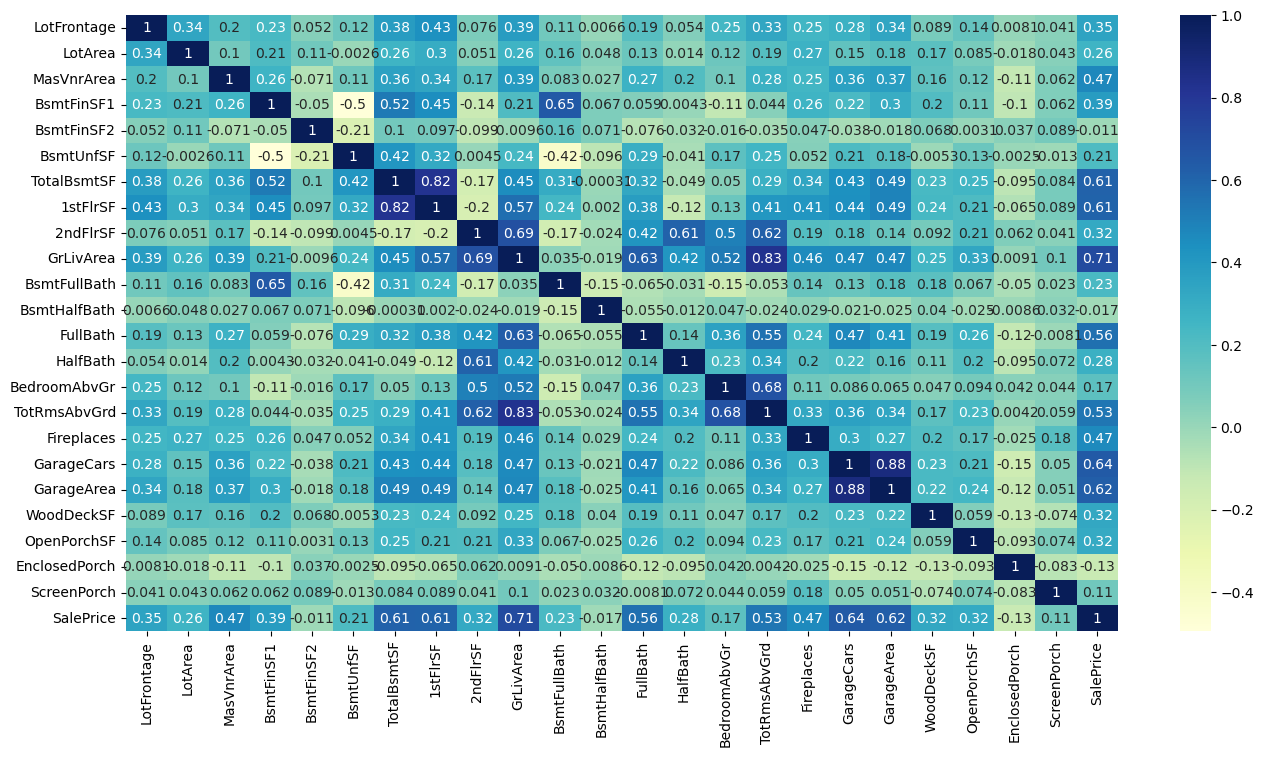

In [17]:
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Difficult to understand, lets plot for top 10 high correlated features

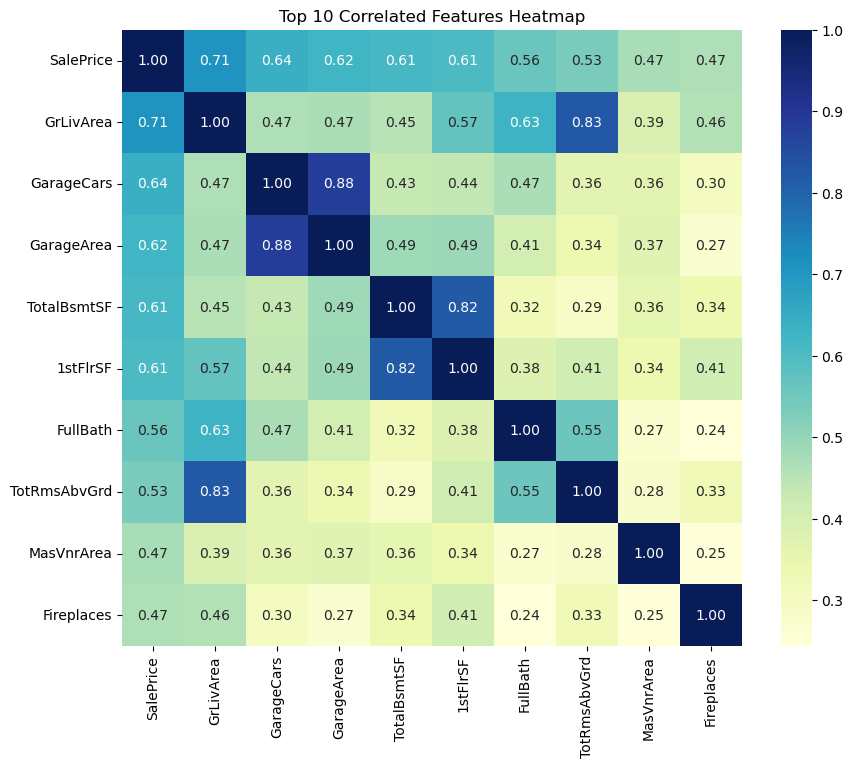

In [18]:
top_corr_features = cor.nlargest(10, 'SalePrice')['SalePrice'].index

# Extract the corresponding correlation values
top_corr_values = cor.nlargest(10, 'SalePrice')['SalePrice'].values

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(housing[top_corr_features].corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Top 10 Correlated Features Heatmap")
plt.show()

The heatmap shows some useful insights:

Correlation of Saleprice with independent variables:
- Price is highly (positively) correlated with `GrLivArea`, `GarageCars`, `GarageArea`, `TotalBsmtSF`, `1stFlrSF`, `FullBath`

- Price is negatively correlated to ```BsmtFinSF2``` and ```EnclosedPorch```. This suggest that these features might be considered less important by potential buyers.

Correlation among independent variables:
- Many independent variables are highly and positively correlated 
1. `GarageCars` and `GarageArea` (0.88)
2. `GrLivArea` and `TotRmsAbvGrd` (0.83)
3. `1stFlrSF` and `TotalBsmtSF` (0.82)

#### We will be dropping one of the columns in each of these Top 3 pairs to avoid multicollinearity.

In [19]:
housing = housing.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF'], axis = 1)

In [20]:
housing_numeric.drop(['GarageCars', 'TotRmsAbvGrd', '1stFlrSF'], axis = 1, inplace=True)

#### <font color = green> Check if there are outliers in these top 10 correlated features and also the target variable </font>

<Axes: xlabel='SalePrice', ylabel='Density'>

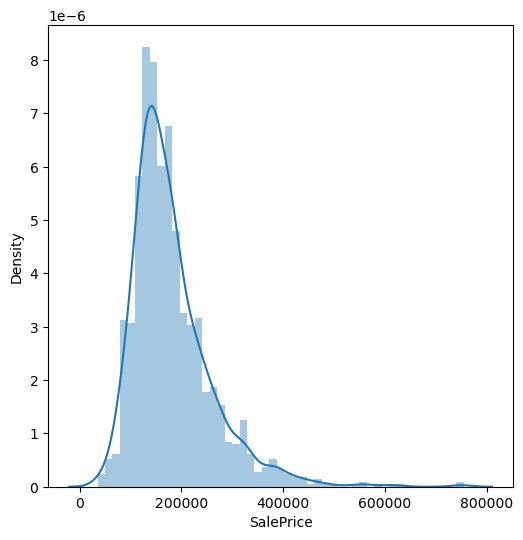

In [21]:
plt.figure(figsize=[6,6])
sns.distplot(housing['SalePrice'])

In [22]:
housing['SalePrice']=np.log(housing['SalePrice'])

Target Variable has outliers and its __skewed__. Though we do scaling of numeric columns before applying regression, we don't do it on target variable to preserve its originality. 

So to handle this skewness we will be using explicit __log transformation__, this will reduce the influence of extreme variables and help the data be more symmetric.


<Axes: xlabel='SalePrice', ylabel='Density'>

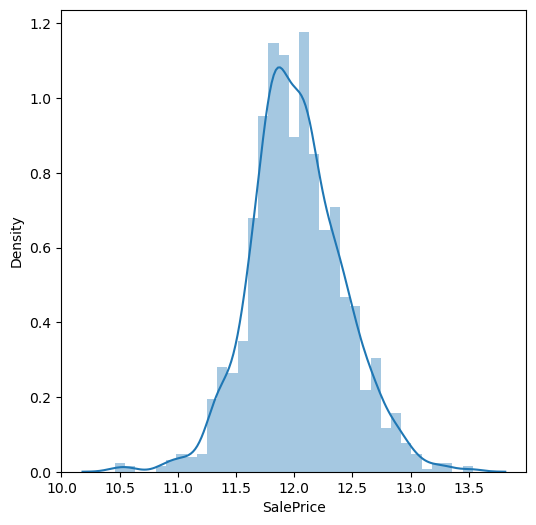

In [23]:
plt.figure(figsize=[6,6])
sns.distplot(housing['SalePrice'])

The skewness in 'SalePrice' is now addressed.

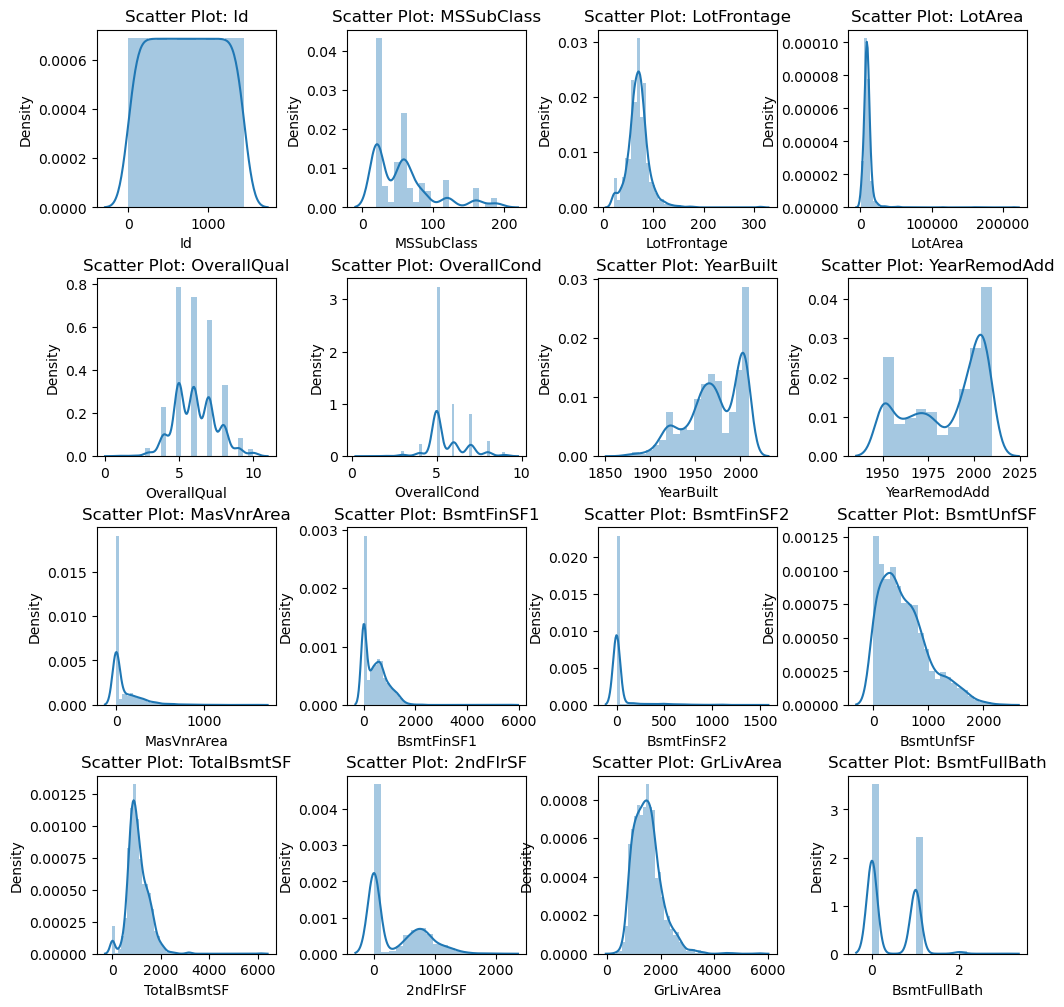

In [24]:
numeric_cols = housing.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols[numeric_cols != 'SalePrice']

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i in range(4):
    for j in range(4):
        if i * 4 + j < len(numeric_cols):
            x_col = numeric_cols[i * 4 + j]
            sns.distplot(housing[x_col], ax=axes[i, j])
            axes[i, j].set_title(f'Scatter Plot: {x_col}')

# Remove any empty subplots if the number of numeric columns is less than 16
for i in range(len(numeric_cols), 16):
    fig.delaxes(axes.flatten()[i])

plt.show()

#### We can see Outliers in `GrLivArea`, `MasVnrArea` and other numeric columns. Let us remove these.

In [25]:
columns_to_handle_outliers = housing_numeric.columns

# Define a function to remove outliers based on the IQR
def handle_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.05)
    Q3 = df[col_name].quantile(0.95)
    df[col_name][df[col_name] < Q1] = Q1
    df[col_name][df[col_name] > Q3] = Q3
    return df

for col in columns_to_handle_outliers:
    housing = handle_outliers(housing, col)

In [26]:
housing.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.435274,9682.319212,6.099315,5.575342,1971.267808,1984.865753,92.047945,431.089041,32.931233,556.537671,1055.950616,337.731267,1498.922123,0.413699,0.056164,1.54863,0.374658,2.882192,0.609589,1868.739726,468.187877,88.889726,42.864829,19.154075,11.580822,6.321918,2007.815753,12.023097
std,421.610009,42.300571,17.072139,3469.967624,1.382997,1.112799,30.202904,20.645407,140.590668,412.214952,100.569218,414.582219,346.901853,415.255848,450.732225,0.492665,0.230318,0.49780,0.484200,0.660102,0.634547,453.697295,202.064708,109.391899,53.144211,50.385647,40.117506,2.703626,1.328095,0.352744
min,1.000000,20.000000,35.000000,3311.700000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,0.000000,848.000000,0.000000,0.000000,1.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,11.385092
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,0.000000,1129.500000,0.000000,0.000000,1.00000,0.000000,2.000000,0.000000,1958.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,730.500000,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,0.000000,1464.000000,0.000000,0.000000,2.00000,0.000000,3.000000,1.000000,1977.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,728.000000,1776.750000,1.000000,0.000000,2.00000,1.000000,3.000000,1.000000,2001.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
90%,1314.100000,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,1232.000000,1602.200000,954.200000,2158.300000,1.000000,0.000000,2.00000,1.000000,4.000000,1.000000,2006.000000,757.100000,262.000000,130.000000,112.000000,0.000000,10.000000,2010.000000,12.535376
95%,1387.050000,160.000000,104.000000,17400.057500,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.010000,1468.000000,1753.000000,1141.002500,2466.005000,1.000000,1.000000,2.00000,1.000000,4.000000,2.000000,2007.000000,850.005000,335.000000,175.002500,180.007500,160.000000,11.000000,2010.000000,12.694668
99%,1445.410000,190.000000,104.000000,17401.150000,10.000000,9.000000,2009.000000,2009.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1141.050000,2466.100000,1.000000,1.000000,2.00000,1.000000,4.000000,2.000000,2009.000000,850.100000,335.000000,175.050000,180.150000,160.000000,12.000000,2010.000000,12.694958


We can see that outliers are handled

### Categorical Variables

In [27]:
housing_categorical = housing.select_dtypes(include=['object'])
additional_categorical_columns = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                                  'GarageYrBlt','MoSold','YrSold']
additional_categorical_data = housing[additional_categorical_columns]
housing_categorical = pd.concat([housing_categorical, additional_categorical_data], axis=1)

housing_categorical.head()

,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,RL,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,WD,Normal,60,7,5,2003,2003,2003.0,2,2008
1,RL,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,WD,Normal,20,6,8,1976,1976,1976.0,5,2007
2,RL,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,WD,Normal,60,7,5,2001,2002,2001.0,9,2008
3,RL,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,WD,Abnorml,70,7,5,1915,1970,1998.0,2,2006
4,RL,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,WD,Normal,60,8,5,2000,2000,2000.0,12,2008


In [28]:
#Fixing GarageYrBlt. Year can't be a float.
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

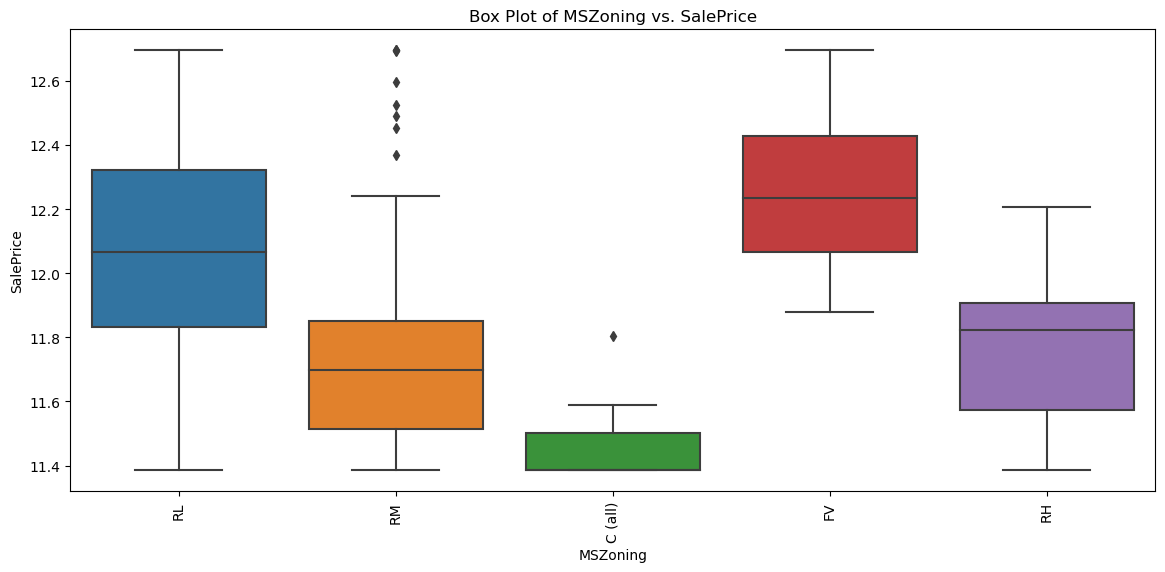

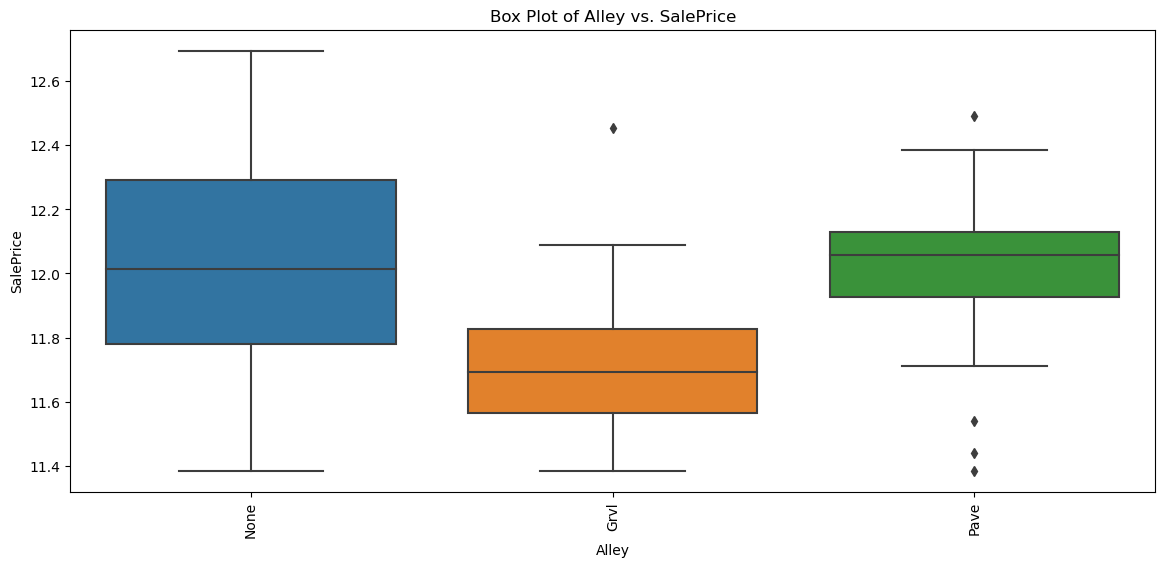

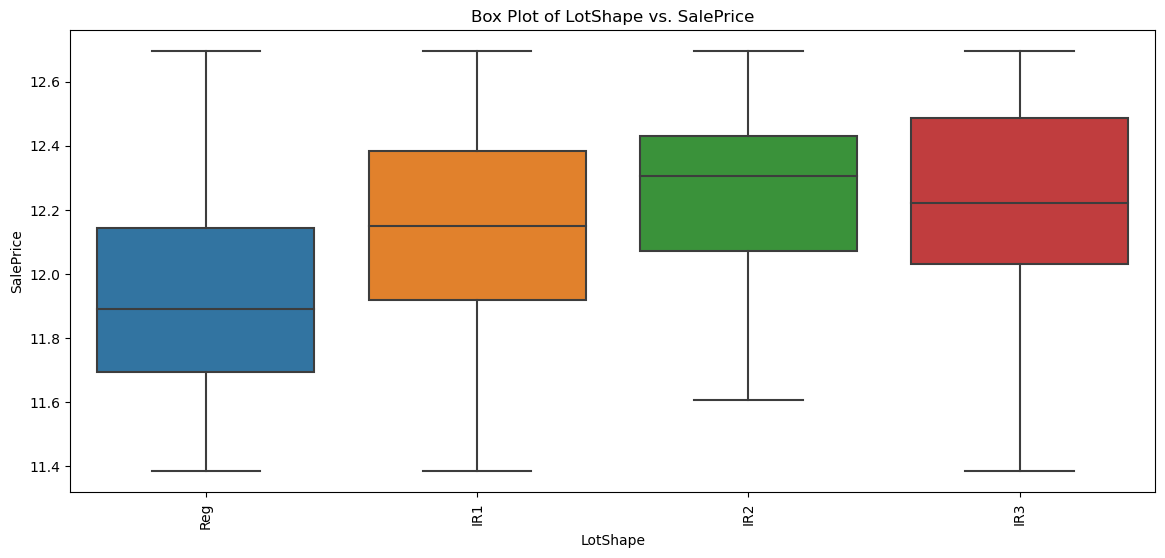

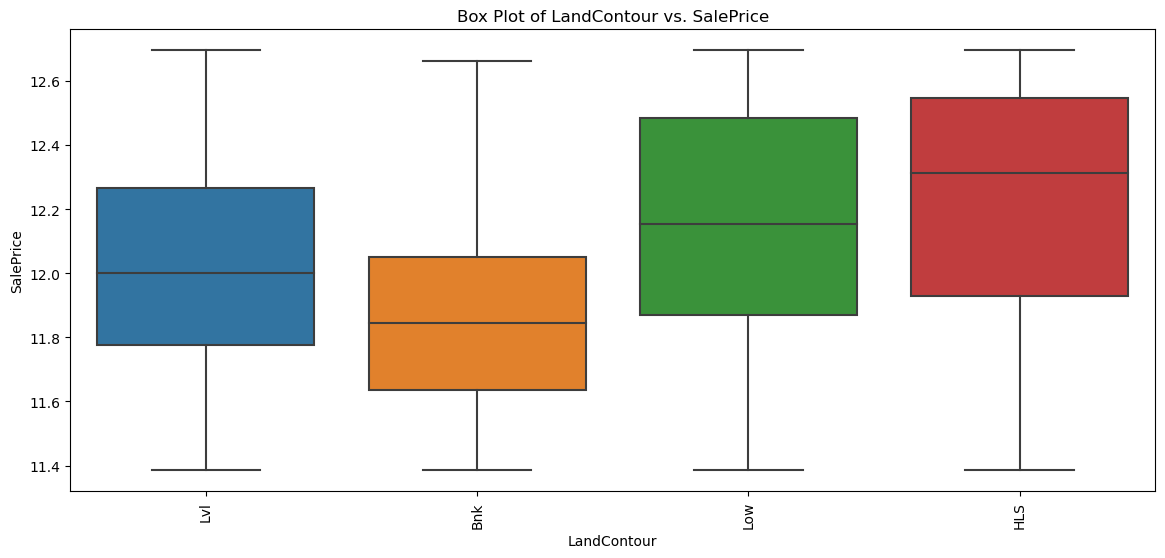

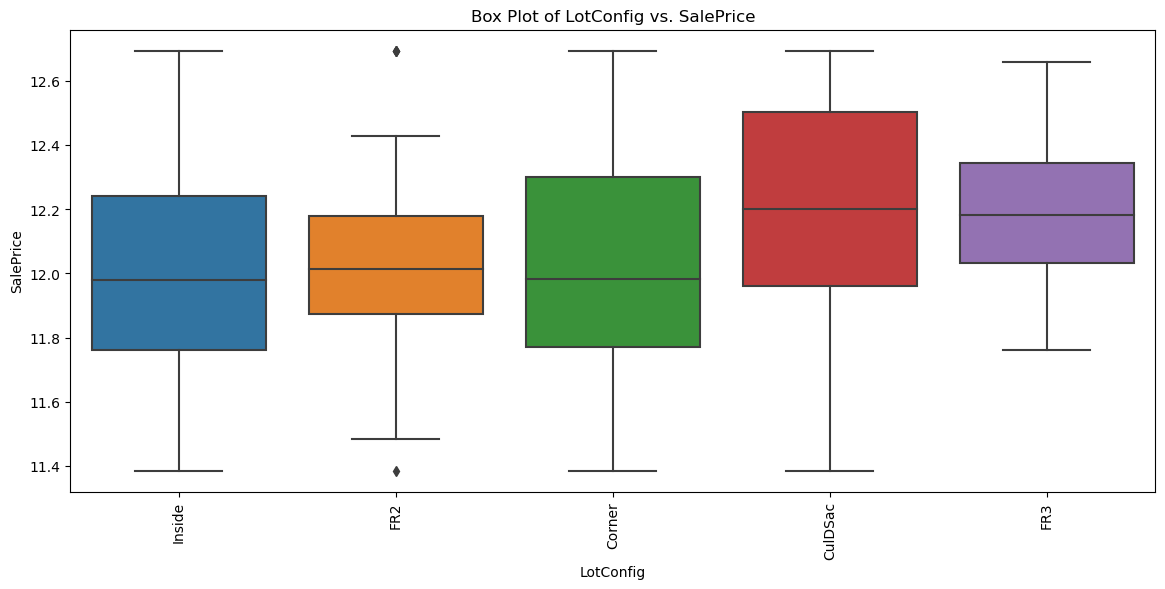

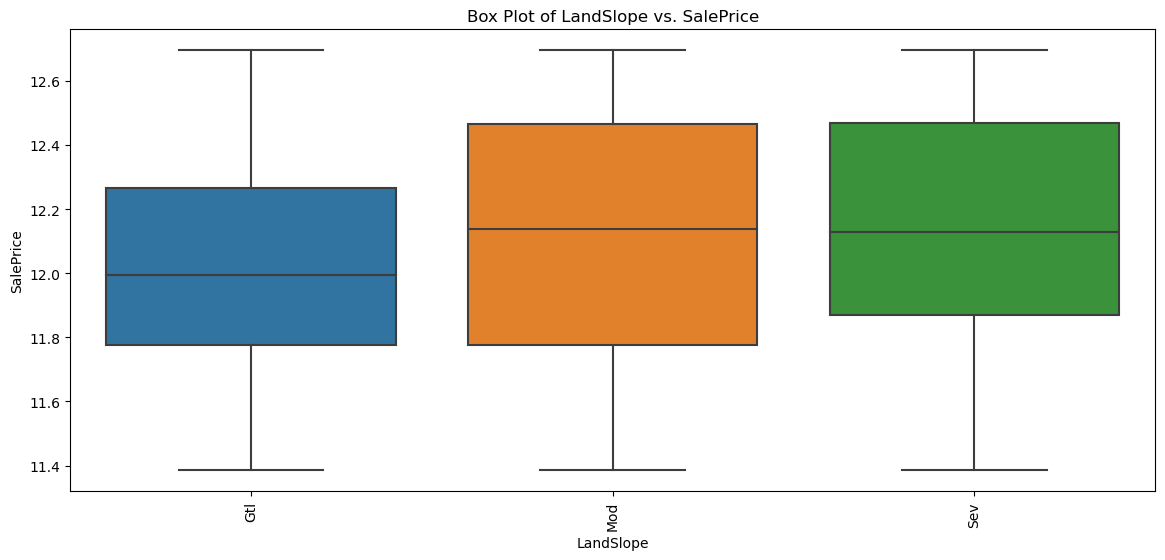

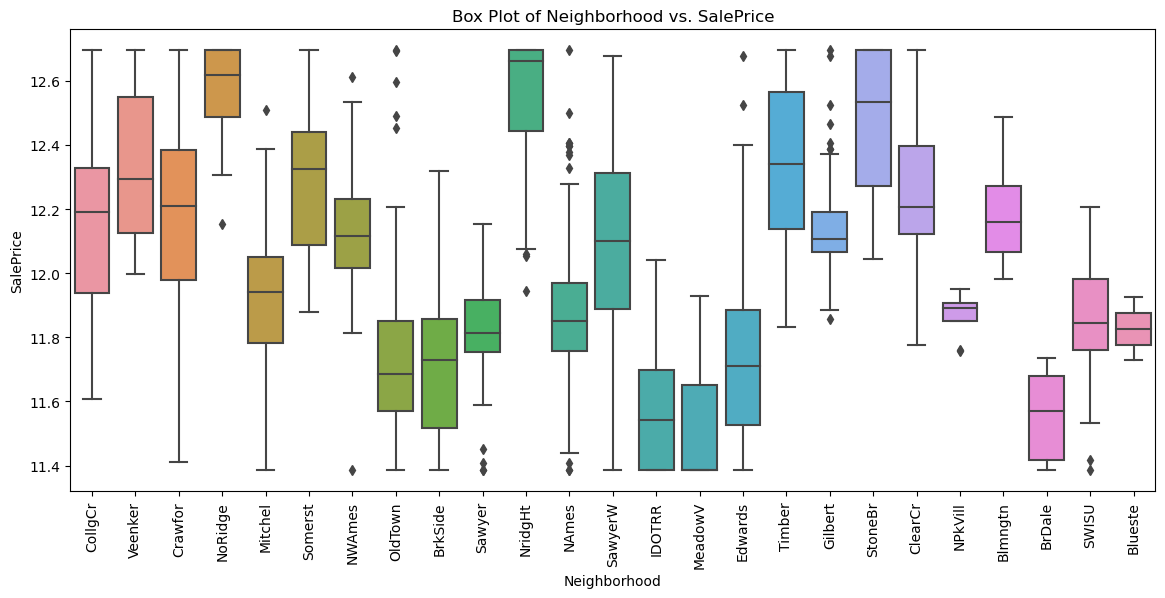

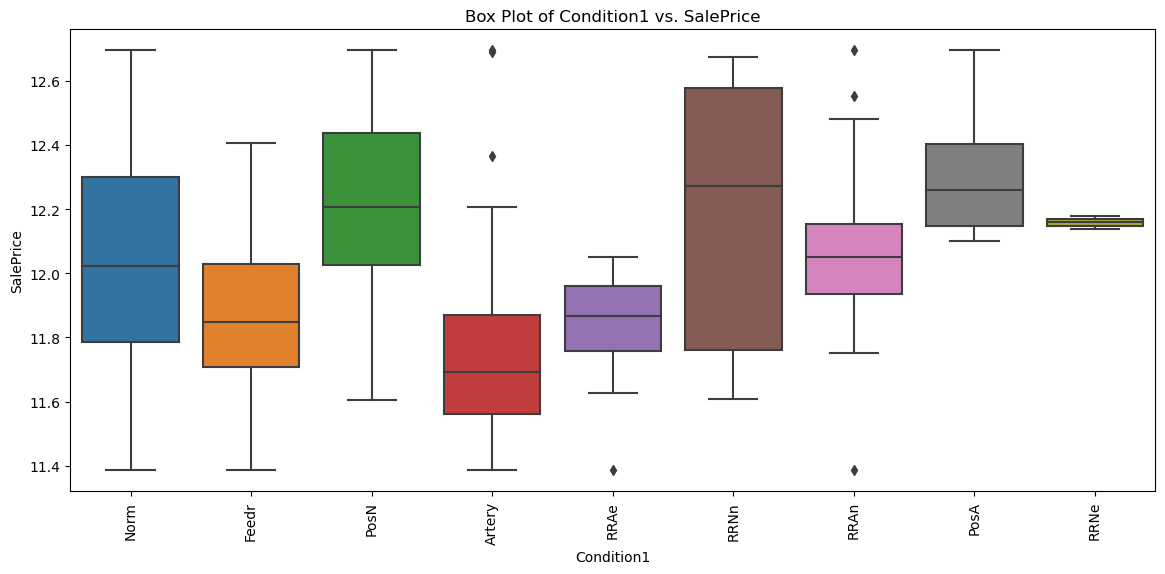

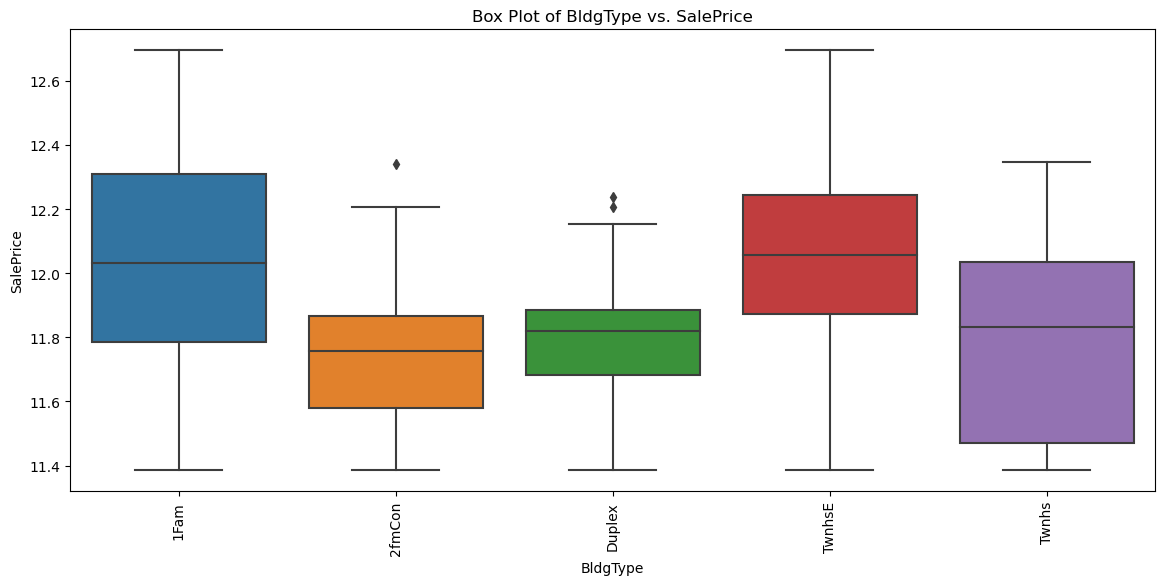

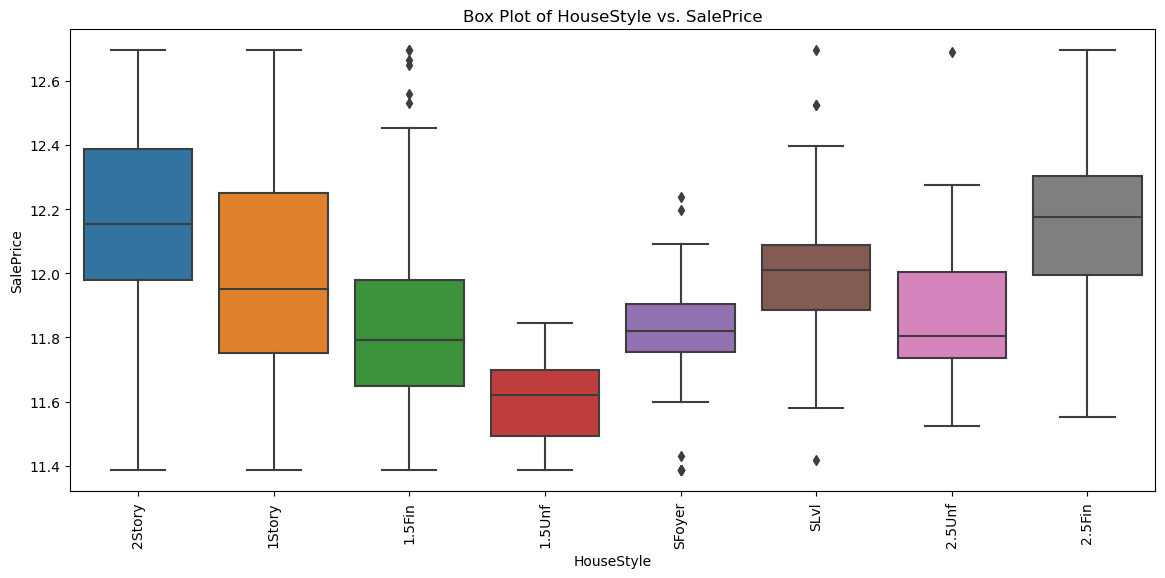

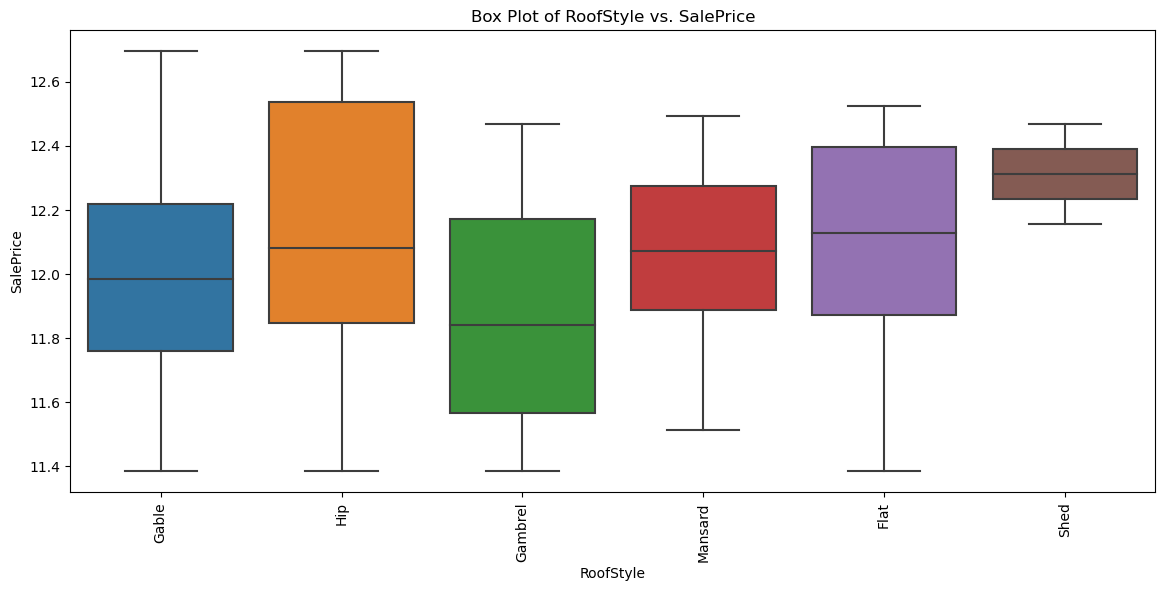

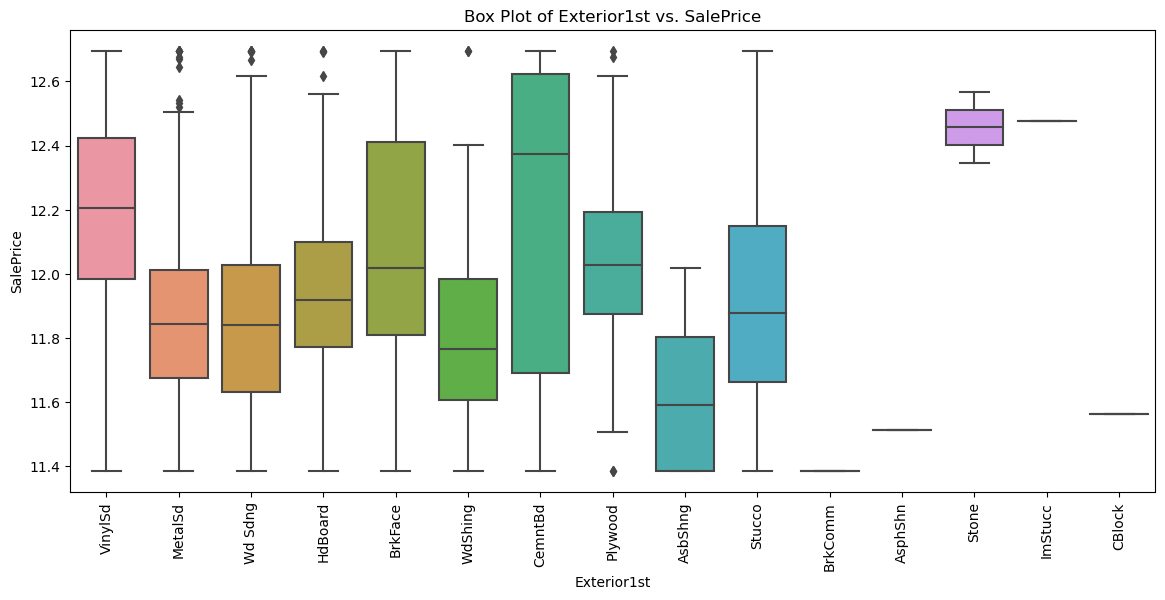

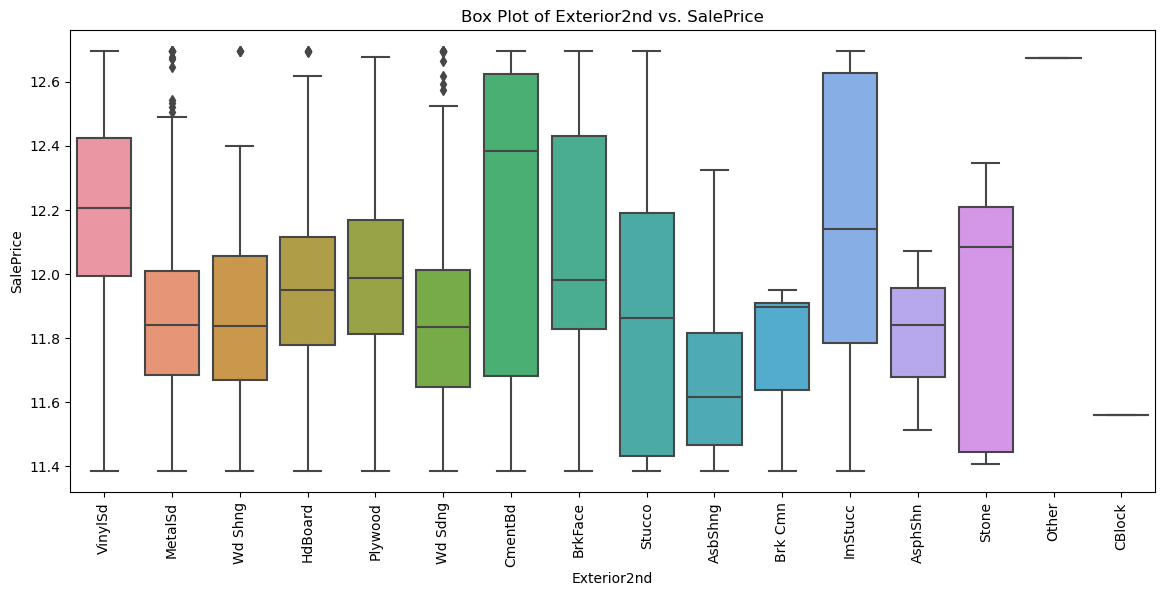

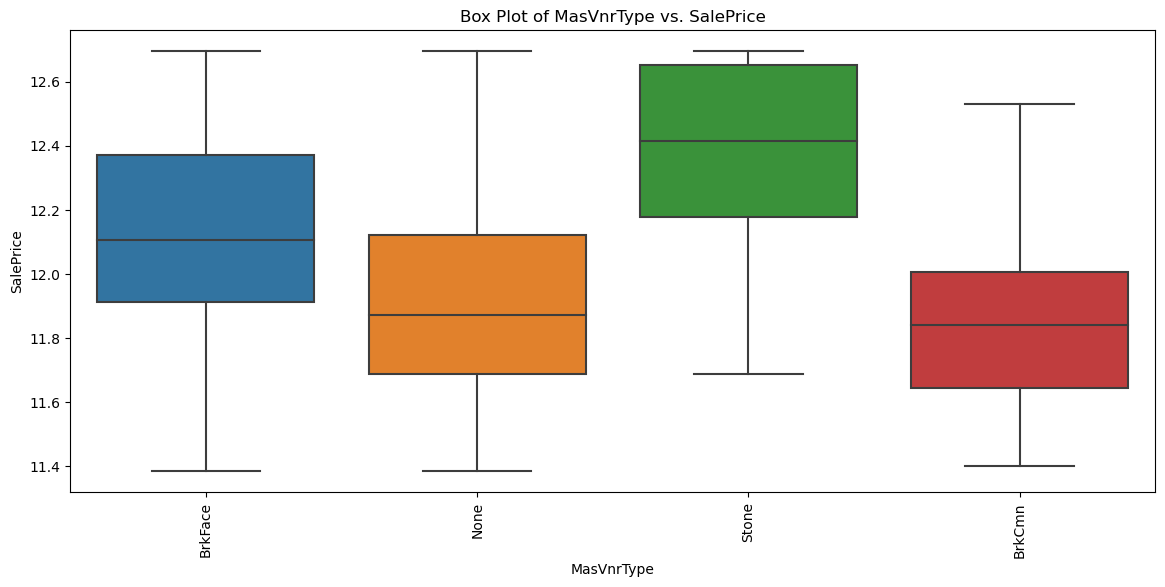

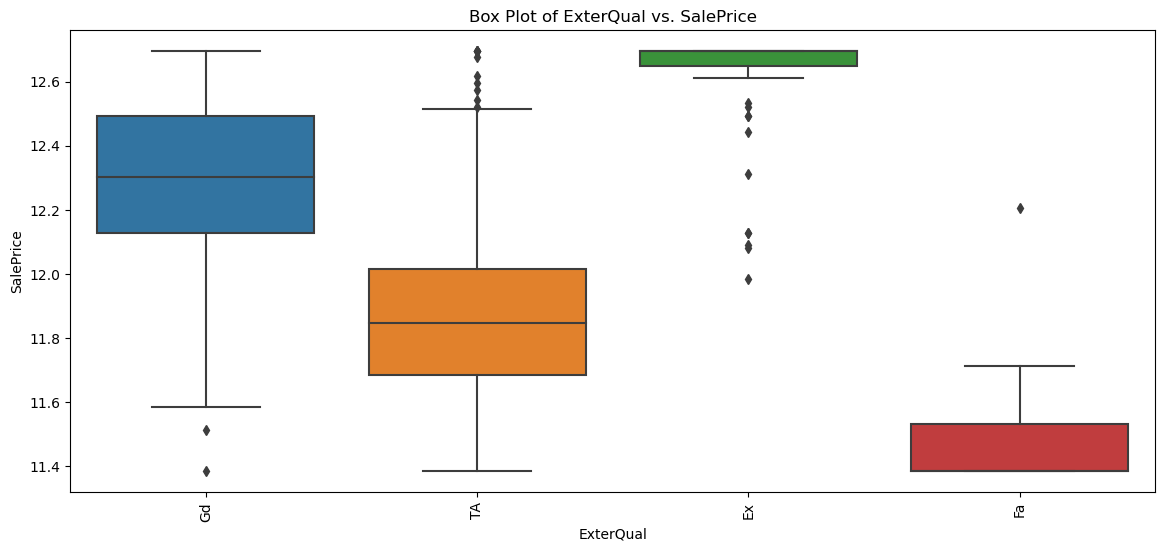

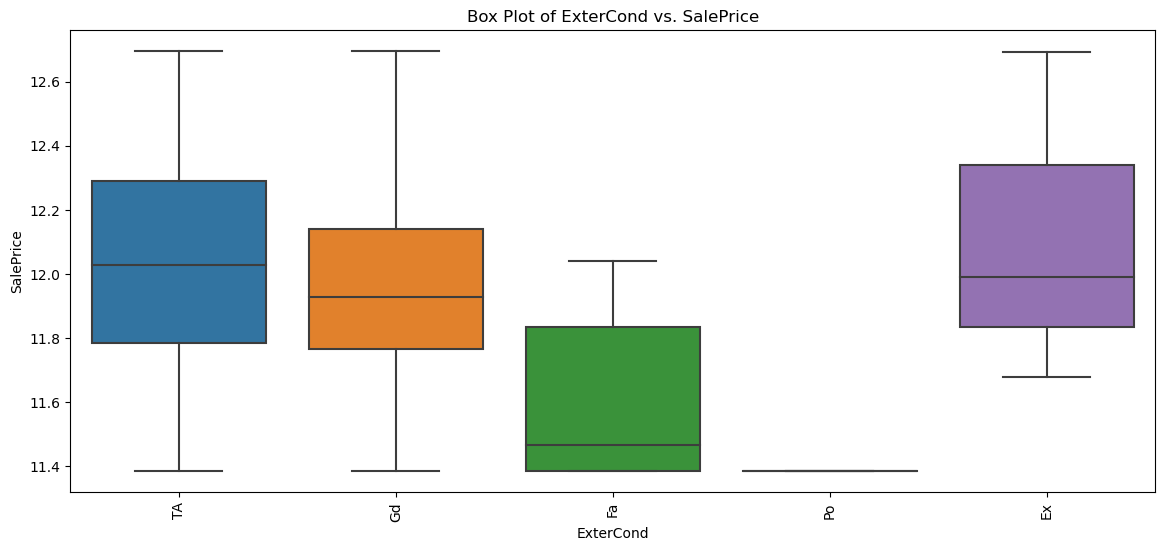

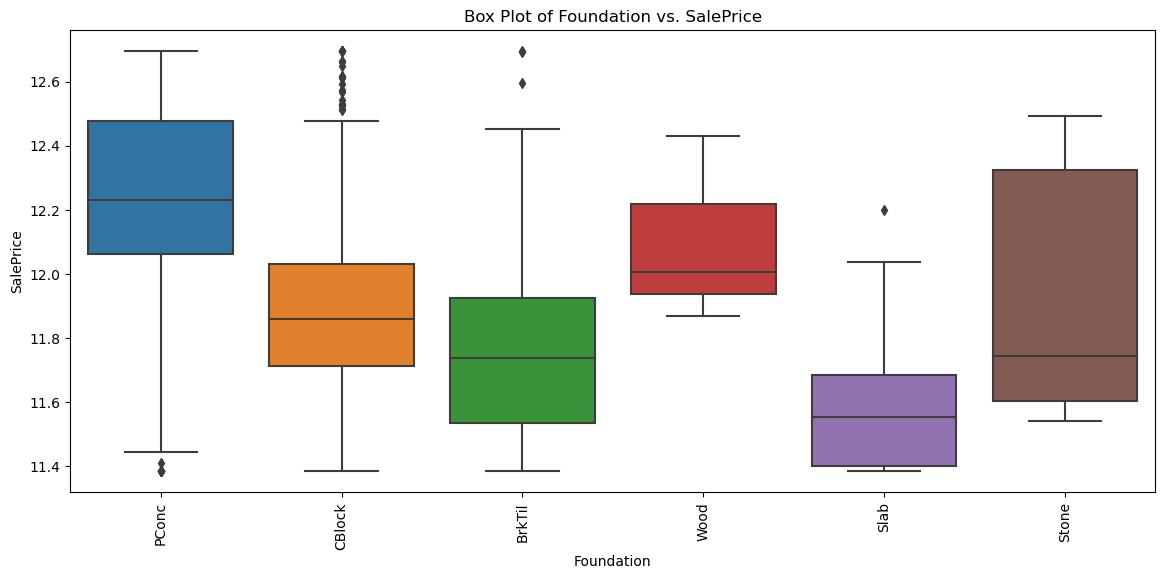

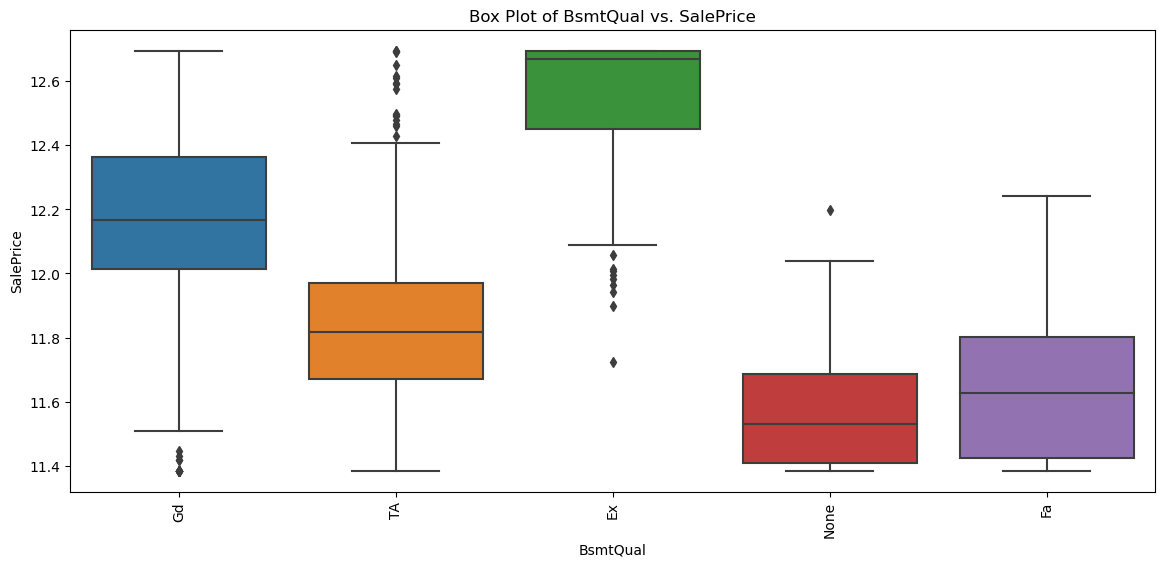

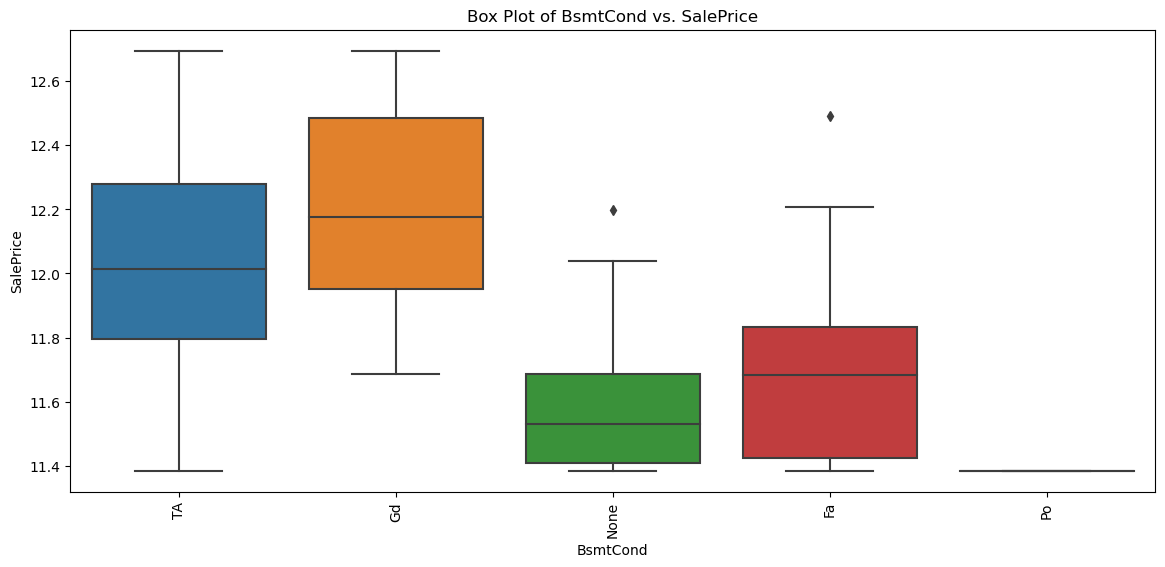

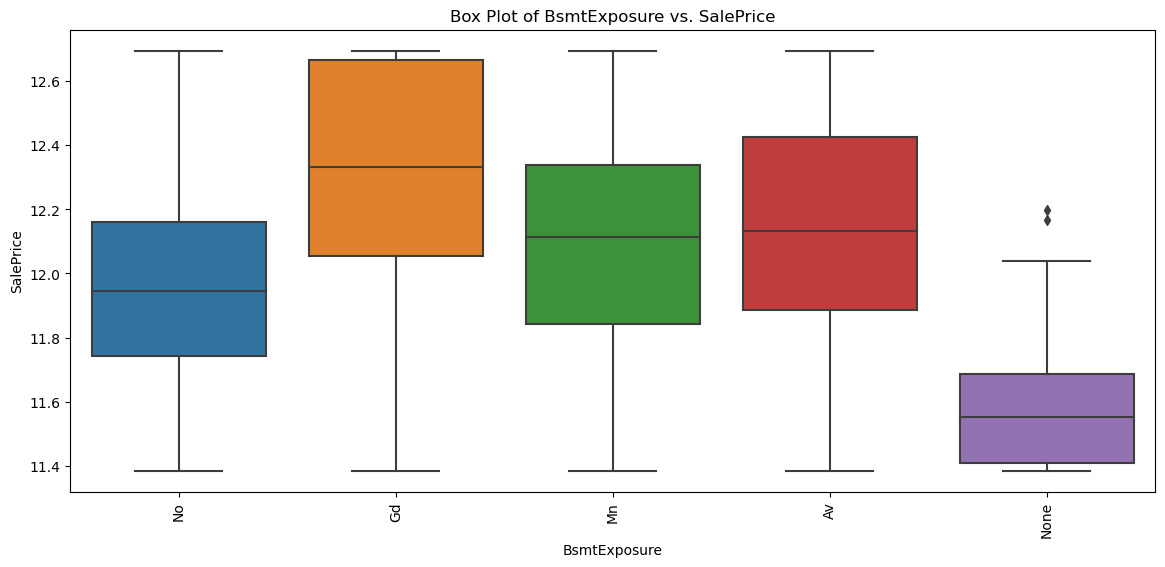

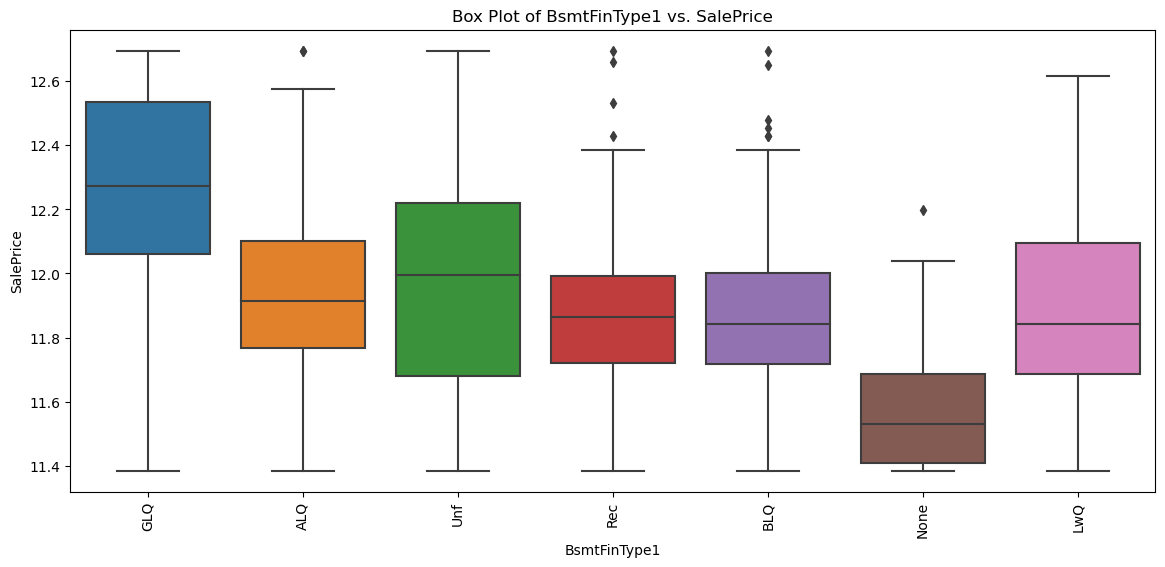

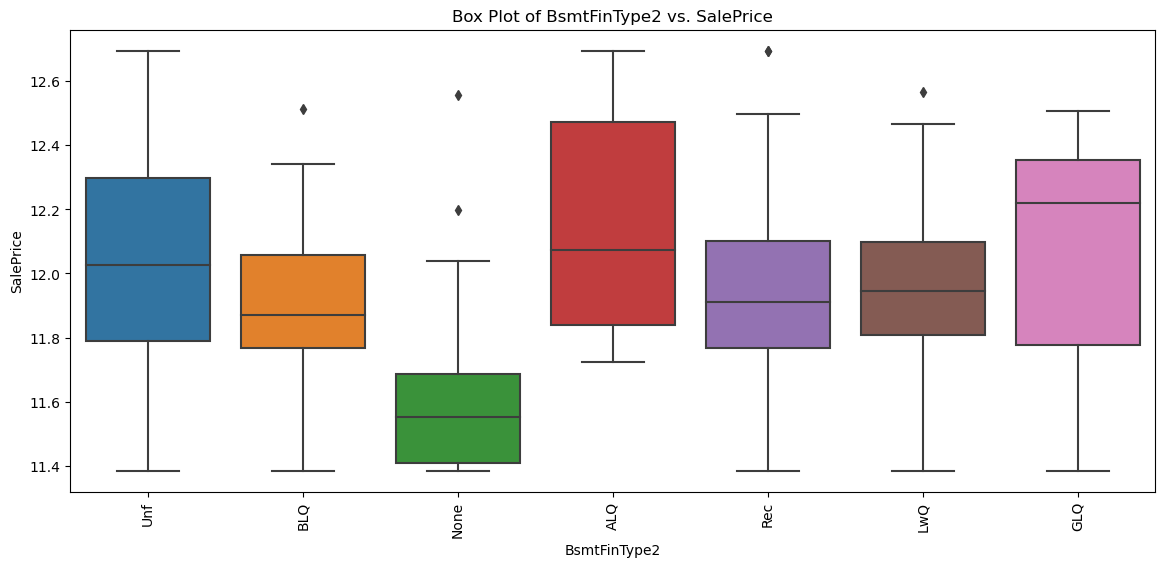

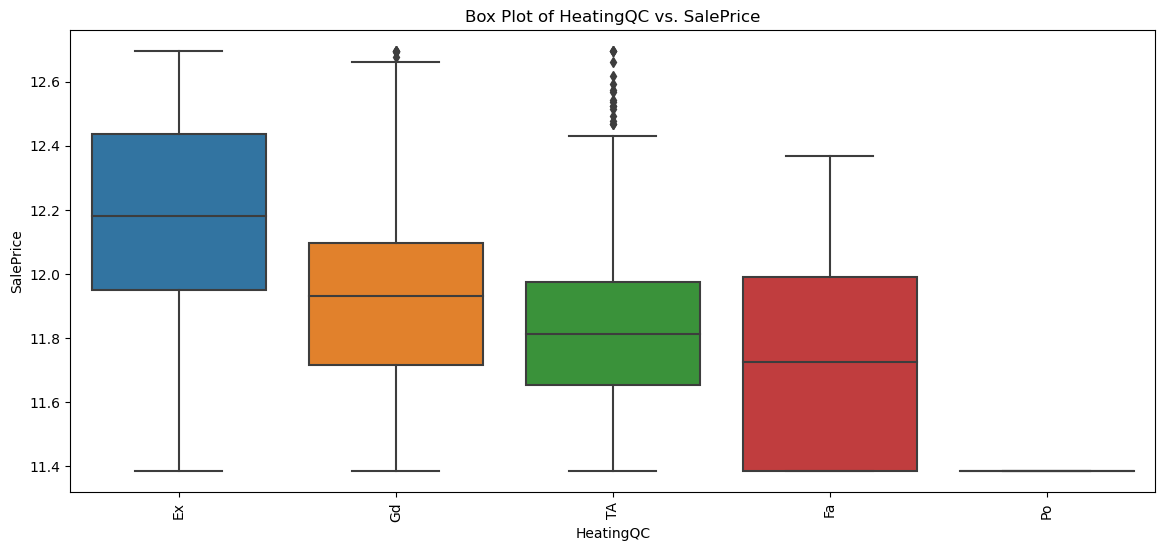

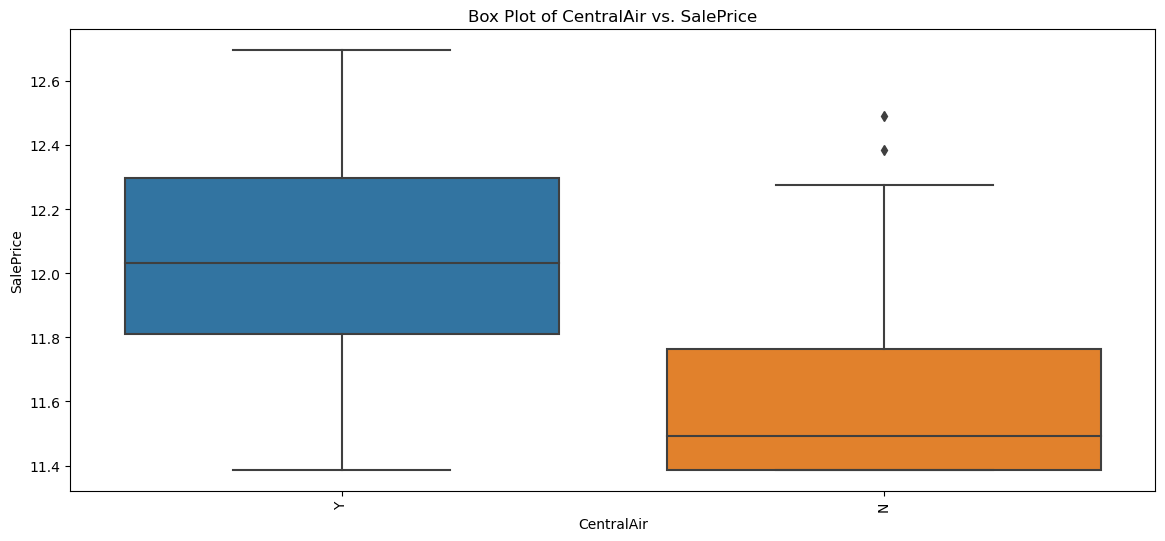

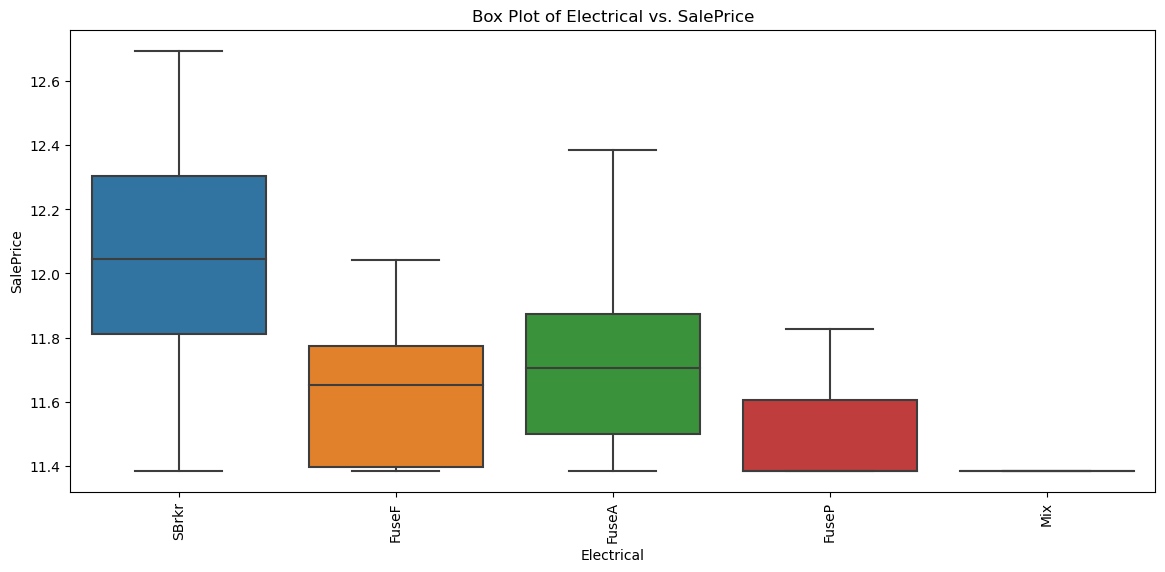

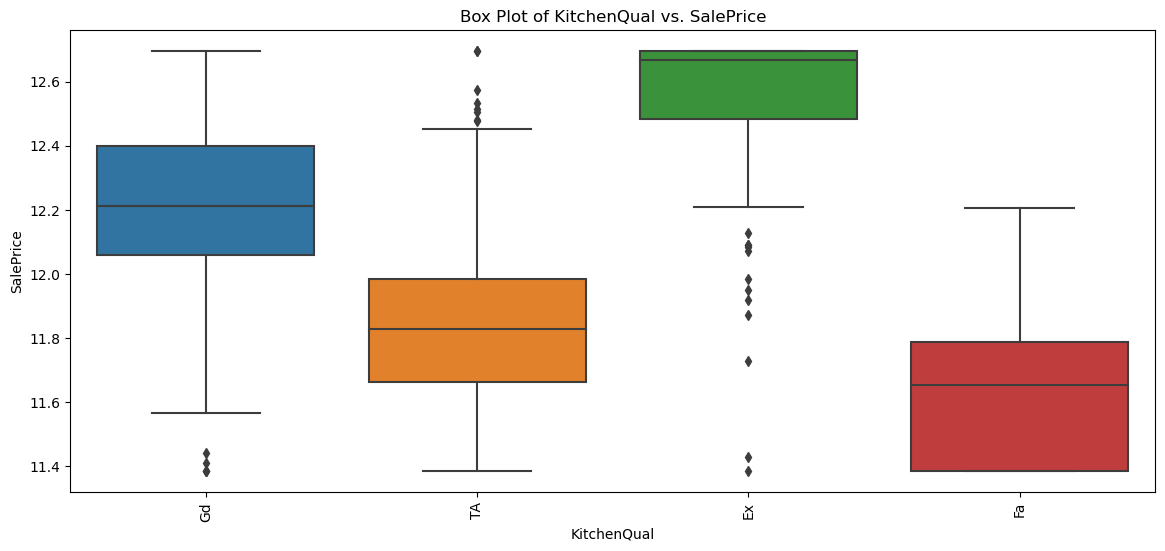

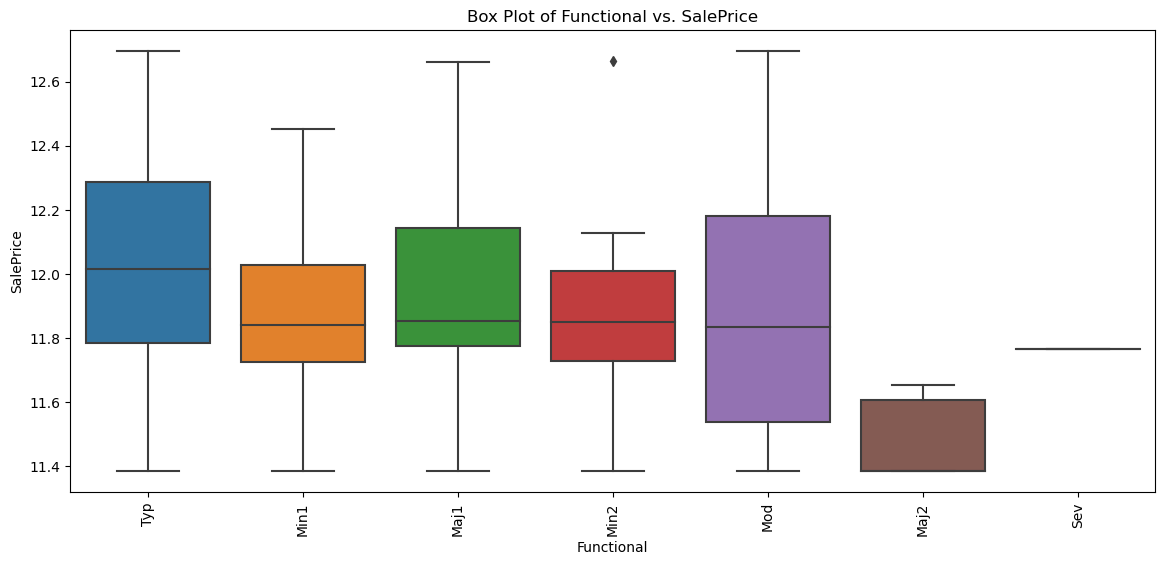

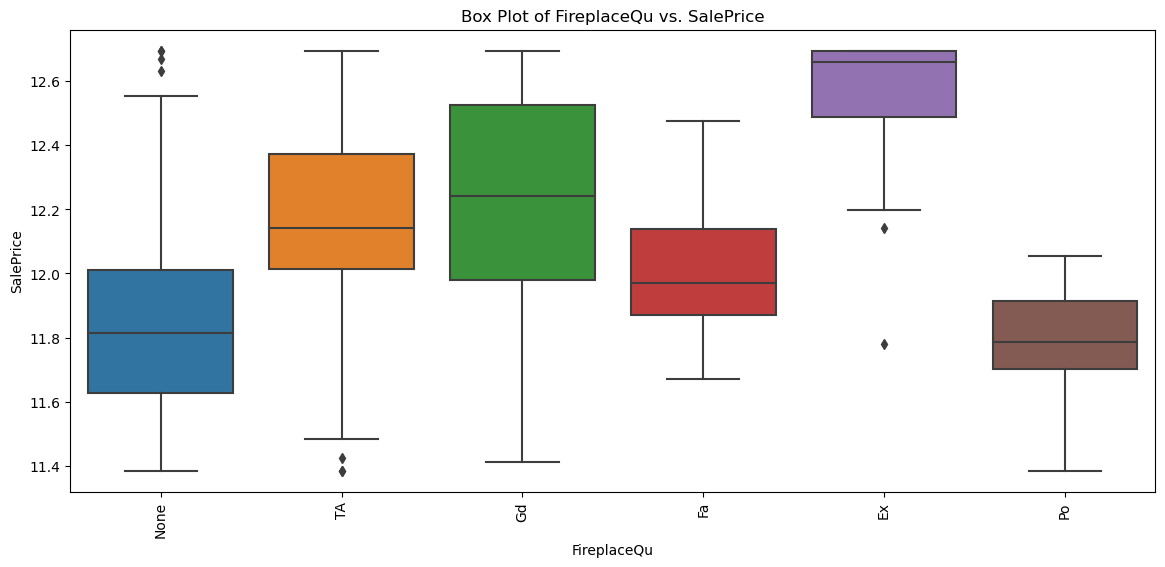

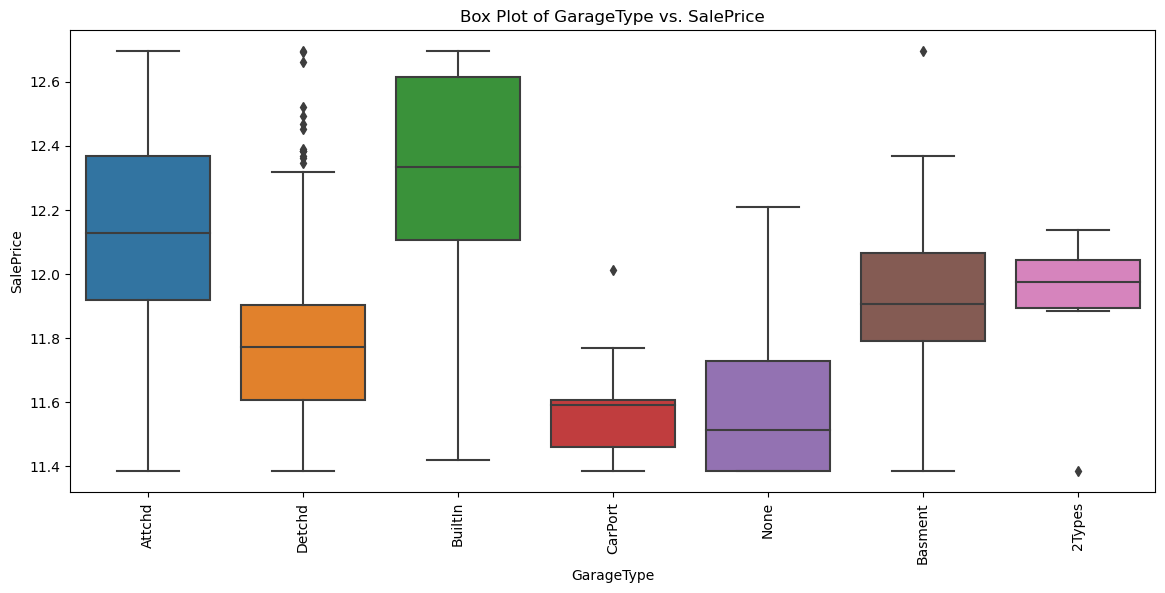

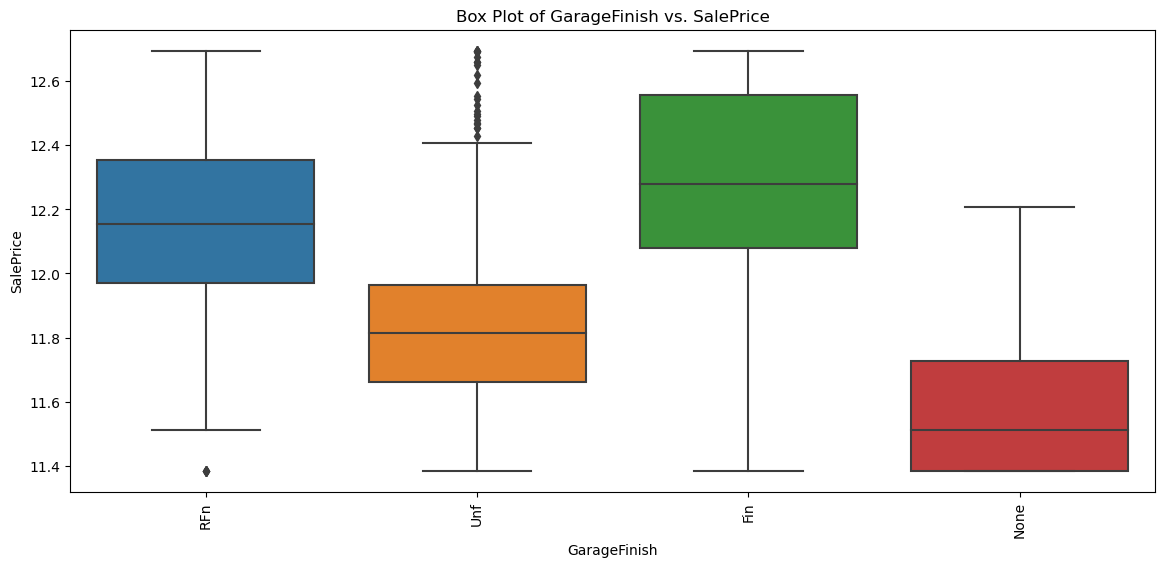

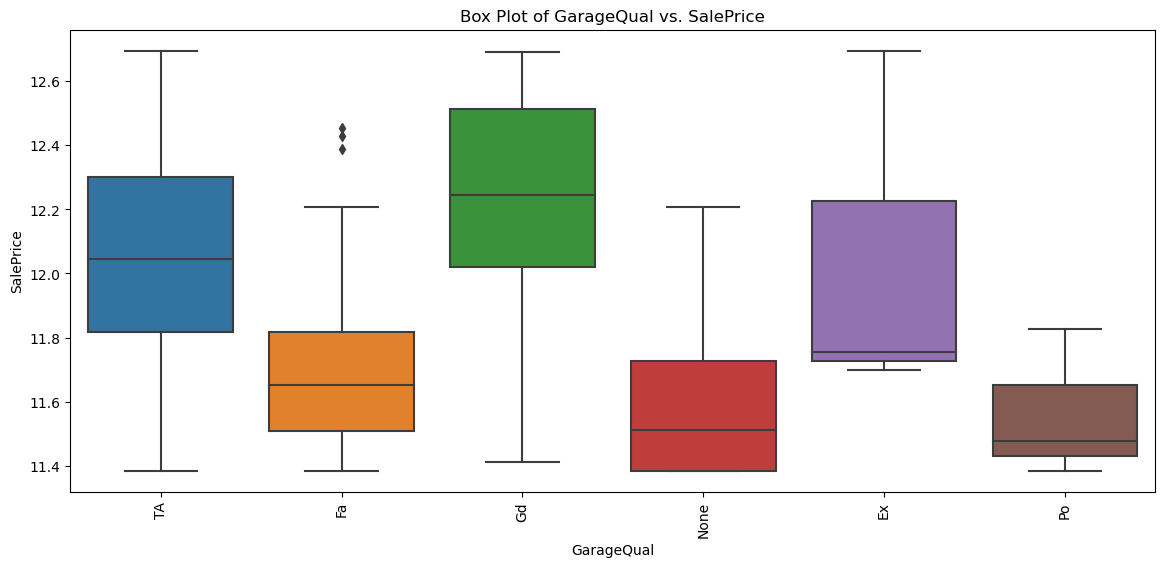

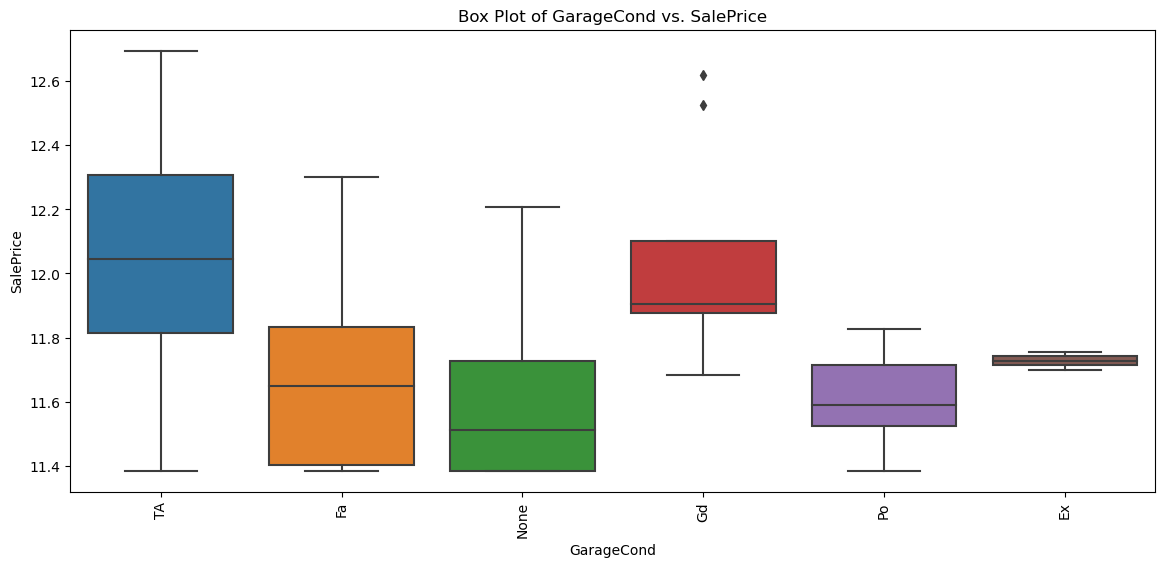

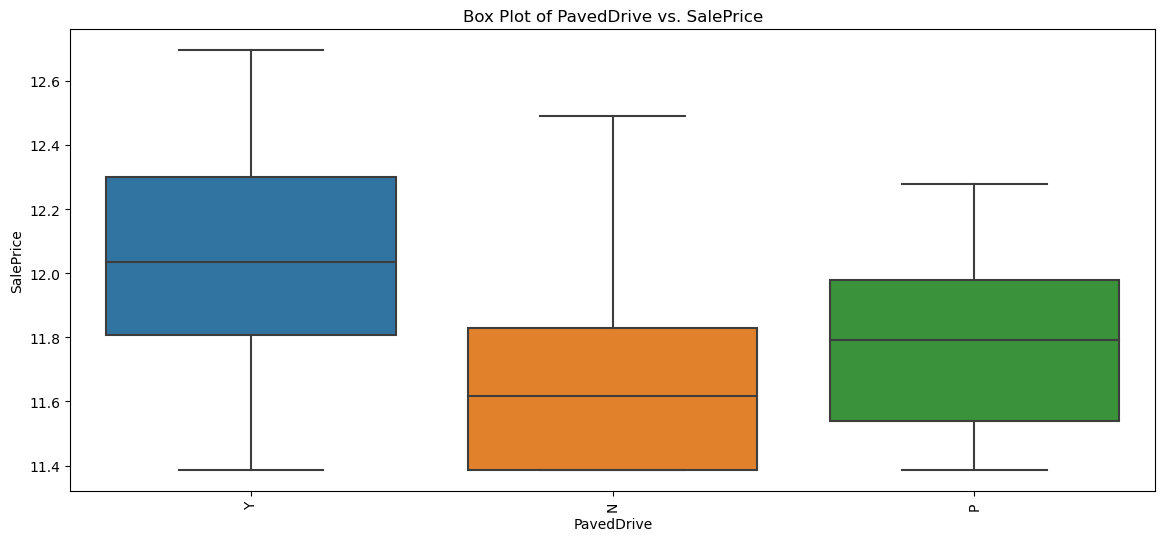

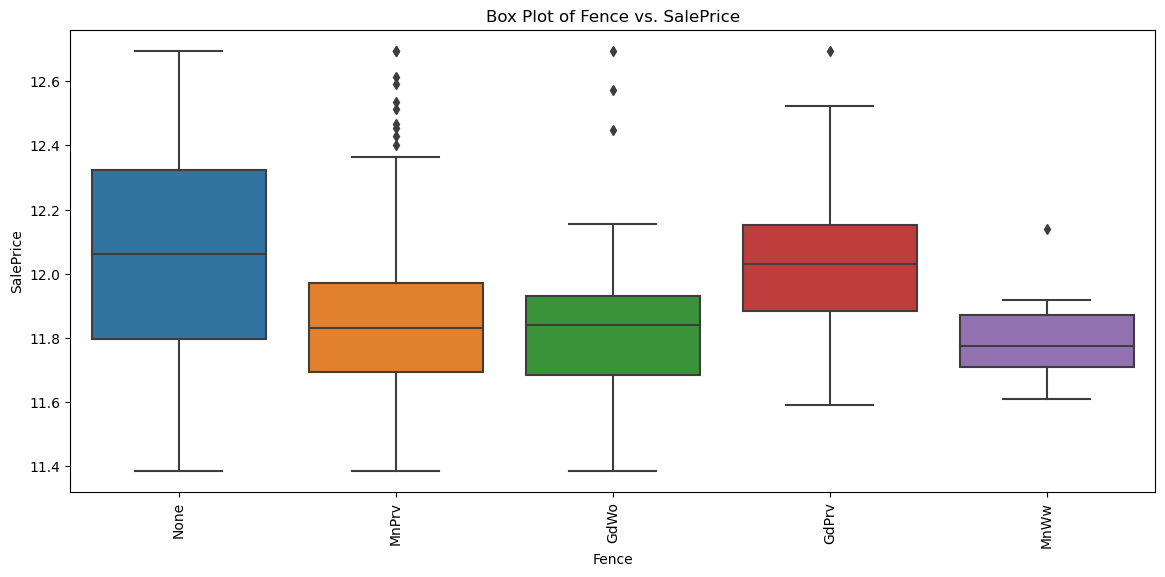

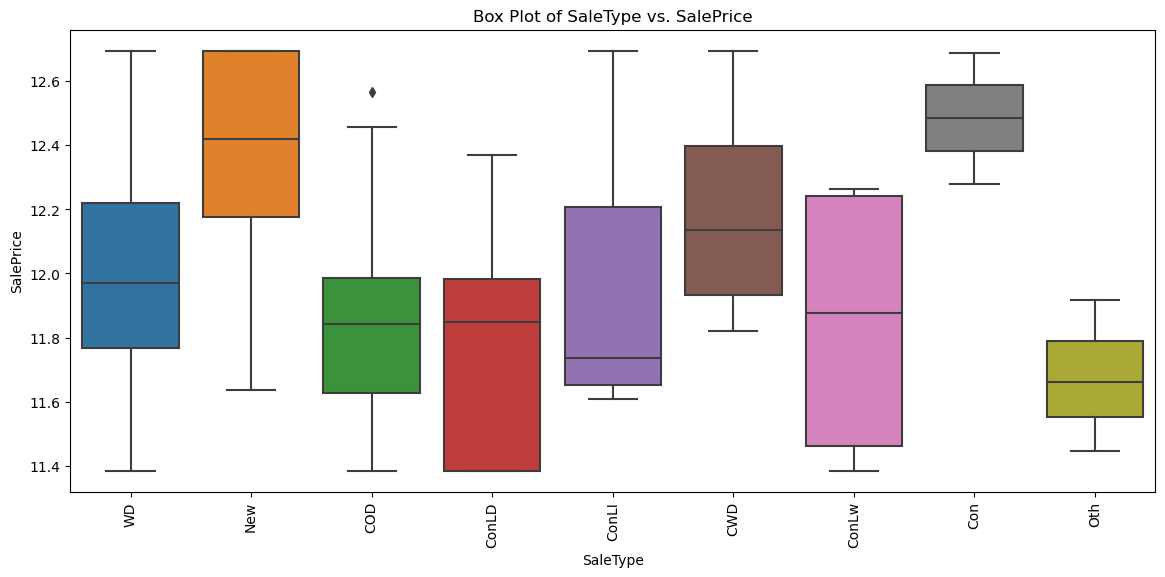

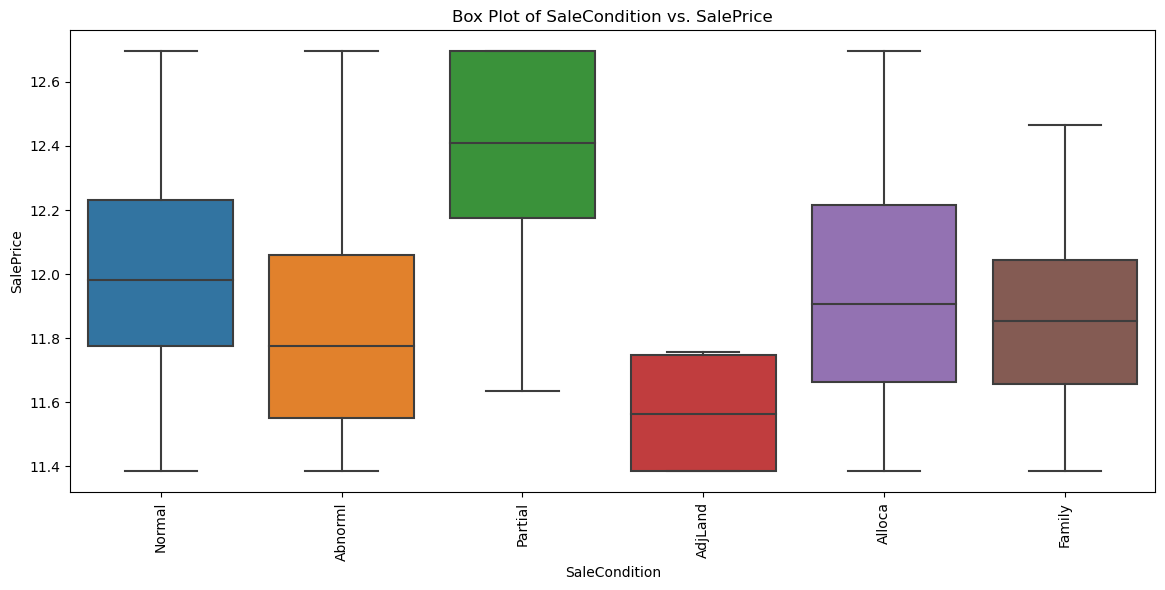

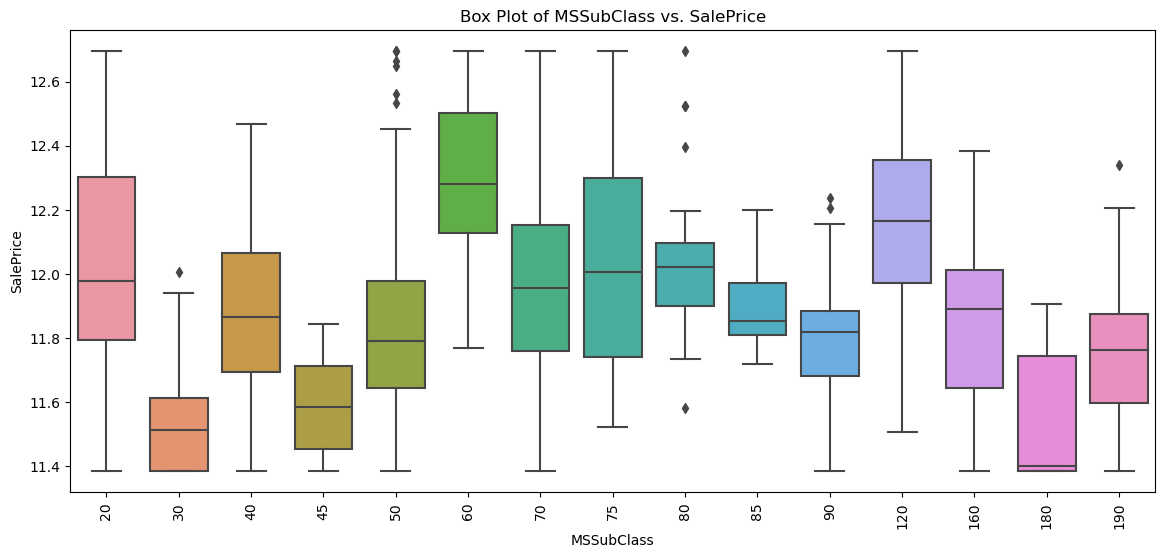

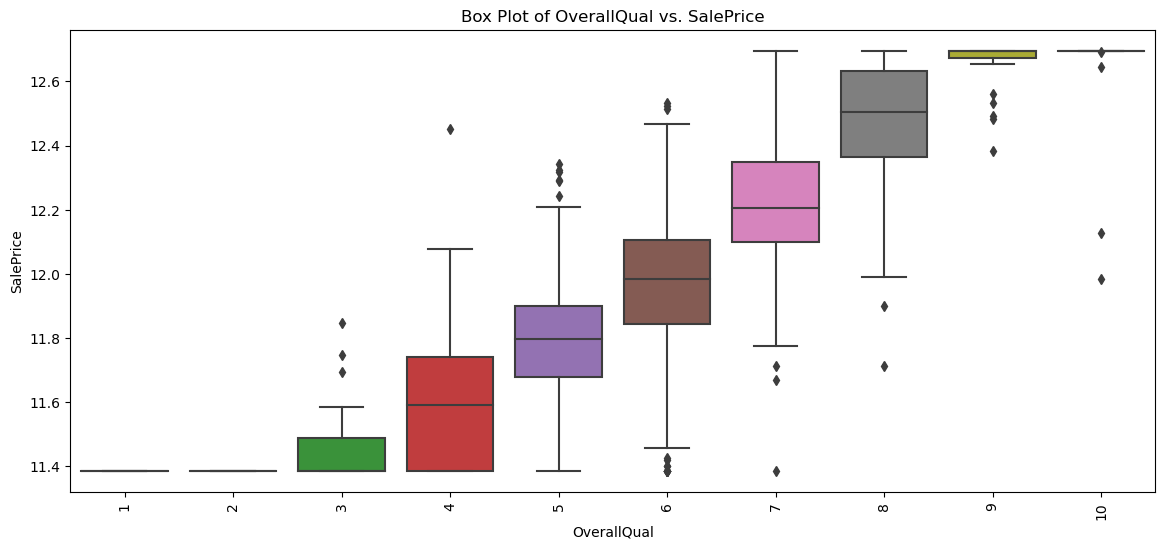

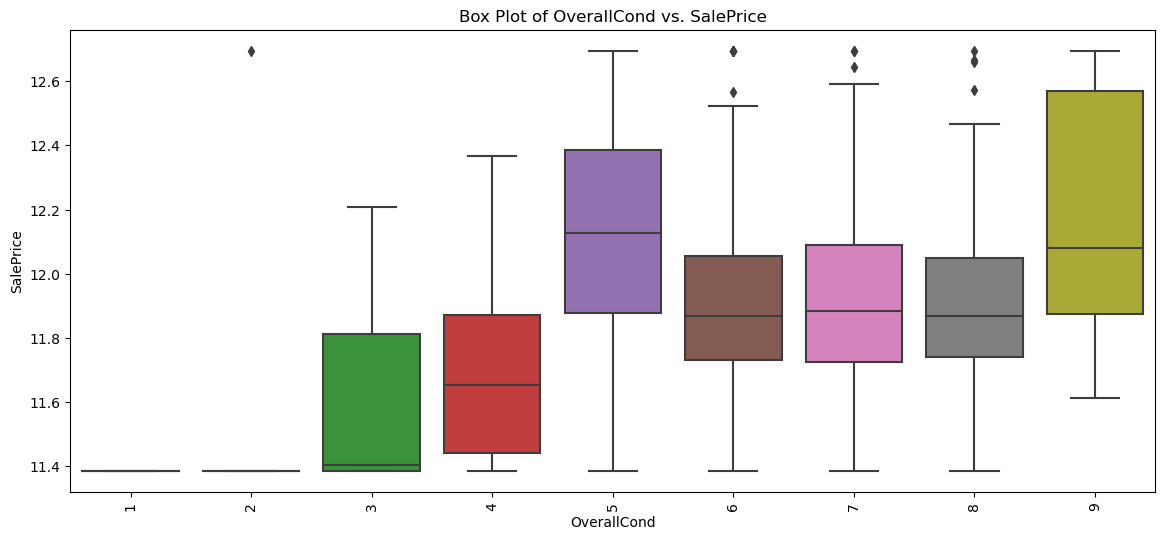

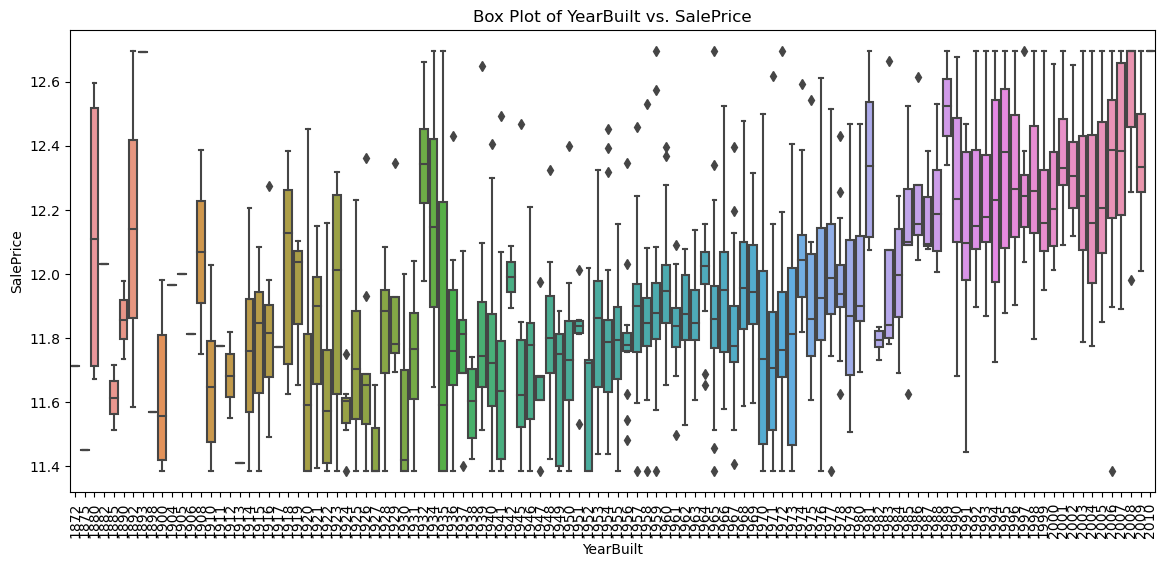

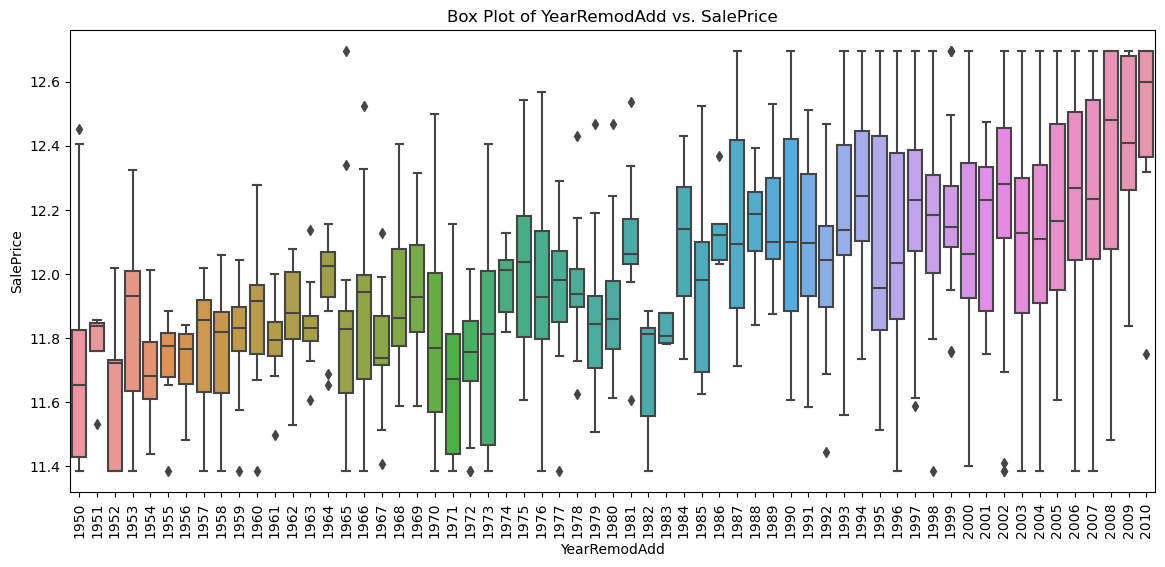

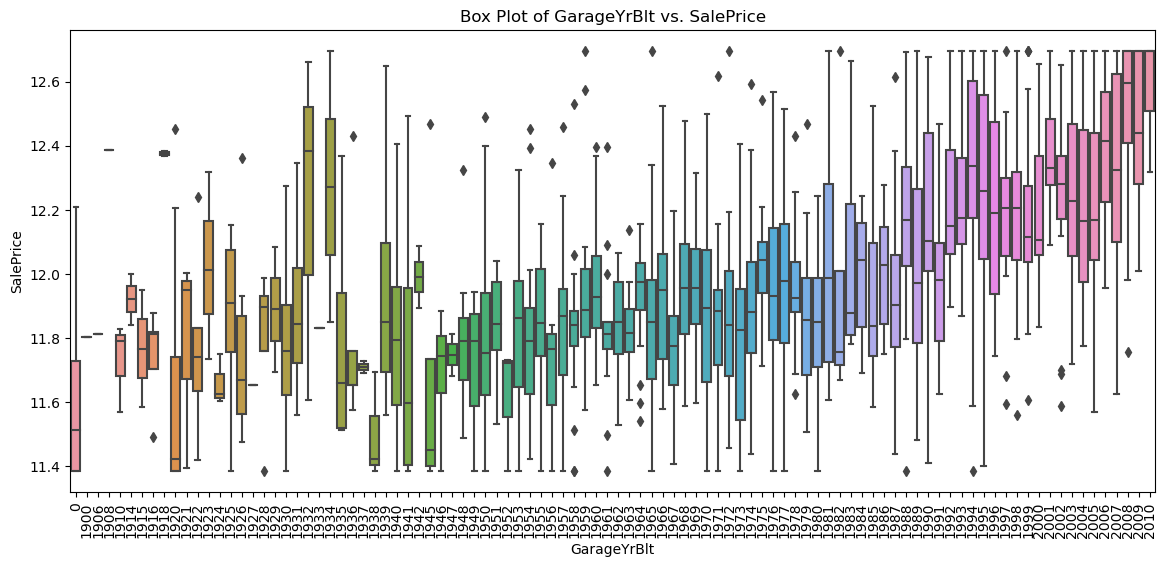

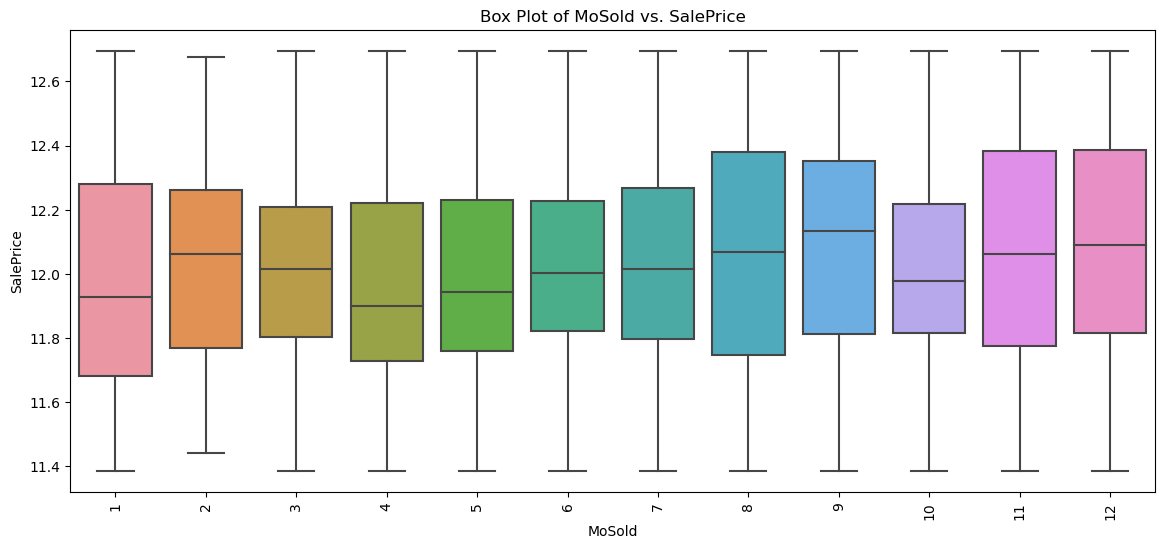

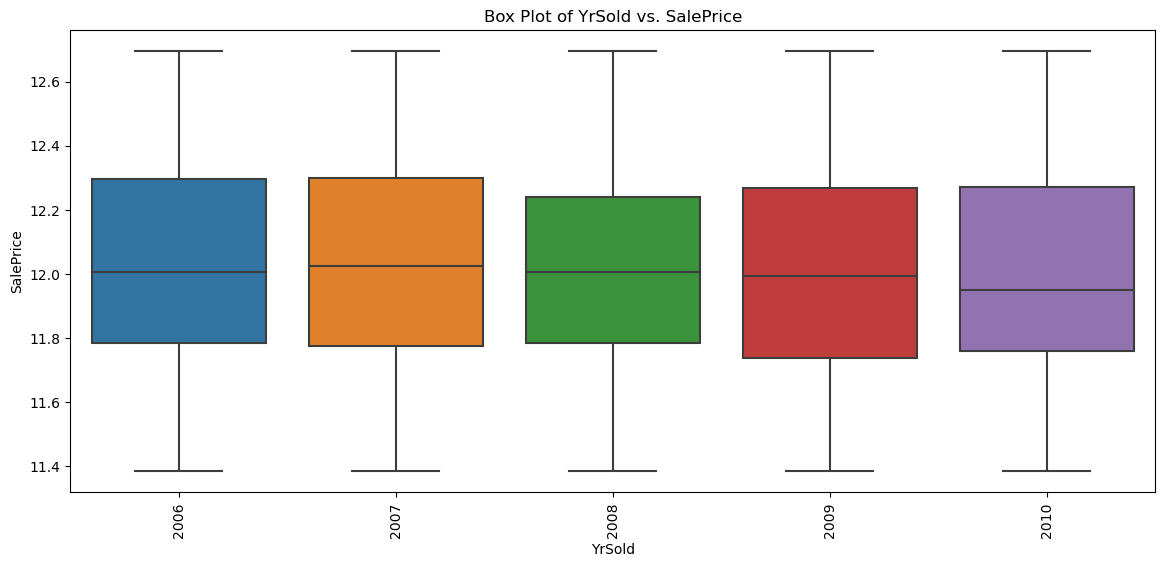

In [29]:
for column_name in housing_categorical.columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(x=column_name, y='SalePrice', data=housing)

    plt.title(f'Box Plot of {column_name} vs. SalePrice')
    plt.xticks(rotation=90)
    plt.show()

### Inferences drawn:
- As `OverallQual` increases, the `SalePrice` also increases.
- `SalePrice` seems to vary with `HouseStyle`. Two storeyed houses seem to be more in demand.
- As `YearBuilt` increases, `SalesPrice` seem to increase
- As `GarageYrBlt` increases, `SalesPrice` seem to increase
- Houses with `Builtin` `GarageType` seems to have higher salesprice

### Handling Year Columns

with `YrSold` and `YearBuilt` as categorical columns, we have seen in box plots that as Year increases, `SalesPrice` goes up as well. Meaning newer the property, more the sales price.

So we will instead use a derived column `PropertyAge`.

Similarly we can derive 
1. `RemodAge` from `YearRemodAdd` and `YrSold`
2. `GarageAge` from `GarageYrBlt` and `YrSold`. 

Therefore, we determine the age of the house, age of garage and the extent of remodeling it underwent at the time of sale.

In [30]:
housing['PropertyAge'] = (housing['YrSold'] - housing['YearBuilt'])
housing['RemodAge'] = (housing['YrSold'] - housing['YearRemodAdd'])
housing['GarageAge'] = (housing['YrSold'] - housing['GarageYrBlt'])

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice,PropertyAge,RemodAge,GarageAge
0,1,60,RL,65.0,8450.0,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0.0,150,856.0,Ex,Y,SBrkr,854.0,1710.0,1,0,2,1,3,Gd,Typ,0,None,Attchd,2003,RFn,548.0,TA,TA,Y,0,61.0,0.00,0,None,2,2008,WD,Normal,12.247694,5,5,5
1,2,20,RL,80.0,9600.0,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0.0,284,1262.0,Ex,Y,SBrkr,0.0,1262.0,0,1,2,0,3,TA,Typ,1,TA,Attchd,1976,RFn,460.0,TA,TA,Y,298,0.0,0.00,0,None,5,2007,WD,Normal,12.109011,31,31,31
2,3,60,RL,68.0,11250.0,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0.0,434,920.0,Ex,Y,SBrkr,866.0,1786.0,1,0,2,1,3,Gd,Typ,1,TA,Attchd,2001,RFn,608.0,TA,TA,Y,0,42.0,0.00,0,None,9,2008,WD,Normal,12.317167,7,6,7
3,4,70,RL,60.0,9550.0,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0.0,540,756.0,Gd,Y,SBrkr,756.0,1717.0,1,0,1,0,3,Gd,Typ,1,Gd,Detchd,1998,Unf,642.0,TA,TA,Y,0,35.0,180.15,0,None,2,2006,WD,Abnorml,11.849398,91,36,8
4,5,60,RL,84.0,14260.0,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0.0,490,1145.0,Ex,Y,SBrkr,1053.0,2198.0,1,0,2,1,4,Gd,Typ,1,TA,Attchd,2000,RFn,836.0,TA,TA,Y,192,84.0,0.00,0,None,12,2008,WD,Normal,12.429216,8,8,8


In [31]:
# Removing redundant columns
# We will remove MoSold as well since this column alone doesnt have much business impact on sales price
housing = housing.drop(['Id','YrSold', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'GarageYrBlt'], axis=1)

In [32]:
columns_of_interest = ['PropertyAge', 'RemodAge', 'GarageAge', 'SalePrice']
selected_data = housing[columns_of_interest]
correlation_matrix = selected_data.corr()
print(correlation_matrix)

             PropertyAge  RemodAge  GarageAge  SalePrice
PropertyAge     1.000000  0.594195   0.272252  -0.603199
RemodAge        0.594195  1.000000   0.147186  -0.579812
GarageAge       0.272252  0.147186   1.000000  -0.333446
SalePrice      -0.603199 -0.579812  -0.333446   1.000000


As expected, with __increase in `PropertyAge` | `RemodAge` | `GarageAge` , `SalePrice` seems to go down__. They are negatively correlated with target variable

### <font color = blue> 3: Data Preparation </font>

In [33]:
columns_to_convert = ['MSSubClass', 'OverallQual', 'OverallCond']
housing[columns_to_convert] = housing[columns_to_convert].astype('category')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1460 non-null   float64 
 3   LotArea        1460 non-null   float64 
 4   Alley          1460 non-null   object  
 5   LotShape       1460 non-null   object  
 6   LandContour    1460 non-null   object  
 7   LotConfig      1460 non-null   object  
 8   LandSlope      1460 non-null   object  
 9   Neighborhood   1460 non-null   object  
 10  Condition1     1460 non-null   object  
 11  BldgType       1460 non-null   object  
 12  HouseStyle     1460 non-null   object  
 13  OverallQual    1460 non-null   category
 14  OverallCond    1460 non-null   category
 15  RoofStyle      1460 non-null   object  
 16  Exterior1st    1460 non-null   object  
 17  Exterior2nd    1460 non-null   ob

In [34]:
housing = pd.get_dummies(housing, 
                         columns=housing.select_dtypes(include=['category', 'object']).columns, 
                         drop_first=True)

In [35]:
housing.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice,PropertyAge,RemodAge,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,196.0,706,0.0,150,856.0,854.0,1710.0

In [36]:
housing.shape

(1460, 250)

In [37]:
X = housing.drop(columns=['SalePrice'])  # Extract all variables except the target variable
y = housing['SalePrice'] 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8,
                                                    test_size = 0.2, random_state=100)

### <font color = blue> 4: Model Building and Evaluation </font>

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

In [41]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PropertyAge,RemodAge,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
133,0.907824,-0.823401,0.313394,1.375809,-0.329177,-0.692822

In [42]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PropertyAge,RemodAge,GarageAge,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,-0.555357,-0.199008,-0.652029,0.433271,-0.329177,-0.726

## Linear Regression with RFE

In [43]:
from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe = RFE(estimator=lm, n_features_to_select=50)            
rfe = rfe.fit(X_train, y_train) 

In [44]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 190),
 ('LotArea', False, 69),
 ('MasVnrArea', False, 112),
 ('BsmtFinSF1', False, 154),
 ('BsmtFinSF2', False, 171),
 ('BsmtUnfSF', False, 52),
 ('TotalBsmtSF', False, 30),
 ('2ndFlrSF', False, 152),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 83),
 ('BsmtHalfBath', False, 183),
 ('FullBath', False, 88),
 ('HalfBath', False, 89),
 ('BedroomAbvGr', False, 185),
 ('Fireplaces', False, 194),
 ('GarageArea', False, 63),
 ('WoodDeckSF', False, 92),
 ('OpenPorchSF', False, 163),
 ('EnclosedPorch', False, 177),
 ('ScreenPorch', False, 127),
 ('PropertyAge', True, 1),
 ('RemodAge', False, 72),
 ('GarageAge', False, 85),
 ('MSSubClass_30', False, 70),
 ('MSSubClass_40', False, 144),
 ('MSSubClass_45', False, 172),
 ('MSSubClass_50', False, 187),
 ('MSSubClass_60', False, 174),
 ('MSSubClass_70', False, 37),
 ('MSSubClass_75', False, 80),
 ('MSSubClass_80', False, 75),
 ('MSSubClass_85', False, 119),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 131),
 ('

In [45]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [46]:
lm.fit(X_train_rfe, y_train)

LinearRegression()

In [47]:
results = pd.DataFrame({'Feature': X_train.columns[rfe.support_], 'Coefficient': lm.coef_})
results = results.sort_values(by='Coefficient', ascending=False)

print(results)

                 Feature  Coefficient
18         OverallQual_9     0.289176
26         OverallCond_9     0.250033
32   Exterior2nd_Brk Cmn     0.214984
43        Electrical_Mix     0.210835
17         OverallQual_8     0.197491
8   Neighborhood_Crawfor     0.182253
0              GrLivArea     0.156460
25         OverallCond_8     0.140421
7   Neighborhood_ClearCr     0.131107
29   Exterior1st_BrkFace     0.126330
41       BsmtExposure_Gd     0.118972
5            MSZoning_FV     0.118692
6   Neighborhood_Blueste     0.105385
24         OverallCond_7     0.104848
10  Neighborhood_StoneBr     0.098613
9   Neighborhood_NridgHt     0.090880
16         OverallQual_7     0.088201
19        OverallQual_10     0.080517
23         OverallCond_6     0.061081
47         GarageQual_Gd     0.054650
14         OverallQual_3    -0.030709
22         OverallCond_4    -0.039072
45     GarageFinish_None    -0.041730
48       GarageQual_None    -0.041730
15         OverallQual_4    -0.041829
31   Exterio

In [48]:
from sklearn.metrics import r2_score, mean_squared_error

In [49]:
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test[col])

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8932422970923868
0.8571919293650883
15.539092450599282
5.137715903354787
0.013304017509074728
0.01759491747724242


## Ridge Regression

In [50]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  #Higher the value, better the model
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1, 
                        n_jobs=-1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [51]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=20]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.043685,0.007648,0.006243,0.000293,0.0001,{'alpha': 0.0001},-0.094326,-0.074348,-0.086637,-0.077255,-0.079524,-0.082418,0.007208,26,-0.053456,-0.058358,-0.055484,-0.057224,-0.057326,-0.056370,0.001724
1,0.049680,0.007926,0.008799,0.003457,0.001,{'alpha': 0.001},-0.094299,-0.074320,-0.086622,-0.077219,-0.079465,-0.082385,0.007213,25,-0.053457,-0.058360,-0.055487,-0.057226,-0.057332,-0.056372,0.001726
2,0.040513,0.011680,0.009397,0.002511,0.01,{'alpha': 0.01},-0.094078,-0.074072,-0.086468,-0.076876,-0.078923,-0.082083,0.007272,24,-0.053463,-0.058382,-0.055507,-0.057249,-0.057394,-0.056399,0.001736
3,0.026480,0.003769,0.013157,0.008644,0.05,{'alpha': 0.05},-0.093416,-0.073412,-0.085859,-0.075800,-0.077196,-0.081137,0.007440,23,-0.053497,-0.058480,-0.055561,-0.057375,-0.057661,-0.056515,0.001785
4,0.028255,0.008999,0.007589,0.000813,0.1,{'alpha': 0.1},-0.092874,-0.073101,-0.085225,-0.074847,-0.075931,-0.080396,0.007523,21,-0.053526,-0.058580,-0.055603,-0.057524,-0.057896,-0.056626,0.001838


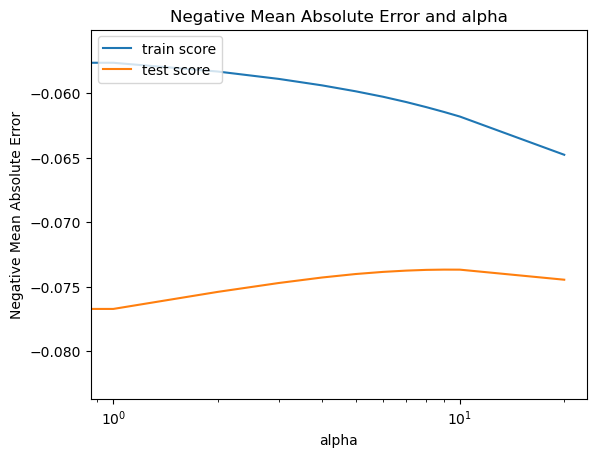

In [52]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

From the graph, we see that Negative Mean Absolute error increases constantly with alpha.<br>
__When alpha hits around 9 to 10, from then on it stabilizes__

In [53]:
print(model_cv.best_params_['alpha'])

9.0


In [54]:
ridge = Ridge(alpha=model_cv.best_params_['alpha'])

ridge.fit(X_train, y_train)

Ridge(alpha=9.0)

In [55]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"R2 Train Data: {r2_train_lr:.2f}")
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"R2 Test Data: {r2_test_lr:.2f}")
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"RSS Train Data: {rss1_lr:.2f}")
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"RSS Test Data: {rss2_lr:.2f}")
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"MSE Train Data: {mse_train_lr:.2f}")
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"MSE Test Data: {mse_test_lr:.2f}")
metric2.append(mse_test_lr**0.5)

R2 Train Data: 0.94
R2 Test Data: 0.91
RSS Train Data: 8.87
RSS Test Data: 3.08
MSE Train Data: 0.01
MSE Test Data: 0.01


In [56]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.884),
 ('LotFrontage', 0.004),
 ('LotArea', 0.023),
 ('MasVnrArea', -0.004),
 ('BsmtFinSF1', 0.008),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', -0.015),
 ('TotalBsmtSF', 0.062),
 ('2ndFlrSF', 0.025),
 ('GrLivArea', 0.093),
 ('BsmtFullBath', 0.01),
 ('BsmtHalfBath', -0.001),
 ('FullBath', 0.012),
 ('HalfBath', 0.013),
 ('BedroomAbvGr', 0.001),
 ('Fireplaces', 0.01),
 ('GarageArea', 0.03),
 ('WoodDeckSF', 0.012),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.003),
 ('ScreenPorch', 0.007),
 ('PropertyAge', -0.052),
 ('RemodAge', -0.026),
 ('GarageAge', 0.0),
 ('MSSubClass_30', -0.04),
 ('MSSubClass_40', -0.006),
 ('MSSubClass_45', 0.001),
 ('MSSubClass_50', 0.001),
 ('MSSubClass_60', -0.011),
 ('MSSubClass_70', 0.043),
 ('MSSubClass_75', 0.015),
 ('MSSubClass_80', 0.005),
 ('MSSubClass_85', 0.016),
 ('MSSubClass_90', -0.028),
 ('MSSubClass_120', 0.008),
 ('MSSubClass_160', -0.051),
 ('MSSubClass_180', -0.026),
 ('MSSubClass_190', -0.021),
 ('MSZoning_FV', 0.052),
 ('MSZoning_RH

In [57]:
mod_ridge = list(zip(cols, model_parameters))

In [58]:
paramRidge = pd.DataFrame(mod_ridge)
paramRidge.columns = ['Variable', 'Coeff']
res=paramRidge.sort_values(by=['Coeff'], ascending = False)
res.head(20)

,Variable,Coeff
0,constant,11.884
9,GrLivArea,0.093
115,OverallCond_9,0.091
61,Neighborhood_Crawfor,0.089
106,OverallQual_9,0.085
105,OverallQual_8,0.077
7,TotalBsmtSF,0.062
206,Functional_Typ,0.062
123,Exterior1st_BrkFace,0.054
38,MSZoning_FV,0.052


In [59]:
paramRidge = paramRidge.sort_values((['Coeff']), axis = 0, ascending = False)
paramRidge

,Variable,Coeff
0,constant,11.884
9,GrLivArea,0.093
115,OverallCond_9,0.091
61,Neighborhood_Crawfor,0.089
106,OverallQual_9,0.085
105,OverallQual_8,0.077
7,TotalBsmtSF,0.062
206,Functional_Typ,0.062
123,Exterior1st_BrkFace,0.054
38,MSZoning_FV,0.052


## Lasso Regression

In [60]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053742,0.034733,0.002957,0.000534,0.0001,{'alpha': 0.0001},-0.085260,-0.071205,-0.077512,-0.068108,-0.071621,-0.074741,0.006076,2,-0.055040,-0.060470,-0.057472,-0.060306,-0.059985,-0.058654,0.002110
1,0.010317,0.001097,0.002569,0.000162,0.001,{'alpha': 0.001},-0.082021,-0.070662,-0.076656,-0.067257,-0.075603,-0.074440,0.005091,1,-0.066103,-0.070020,-0.067248,-0.069555,-0.068853,-0.068356,0.001467
2,0.007504,0.000534,0.002559,0.000140,0.01,{'alpha': 0.01},-0.102385,-0.092534,-0.098236,-0.094682,-0.101400,-0.097847,0.003785,3,-0.095478,-0.097554,-0.096145,-0.096560,-0.096161,-0.096380,0.000682
3,0.005578,0.000091,0.002351,0.000065,0.05,{'alpha': 0.05},-0.128630,-0.117861,-0.118097,-0.122586,-0.120999,-0.121635,0.003924,4,-0.118494,-0.122886,-0.119503,-0.121203,-0.120949,-0.120607,0.001507
4,0.005724,0.000250,0.002469,0.000110,0.1,{'alpha': 0.1},-0.171714,-0.163626,-0.155192,-0.163553,-0.158180,-0.162453,0.005645,5,-0.159048,-0.162394,-0.159850,-0.161171,-0.162038,-0.160900,0.001276


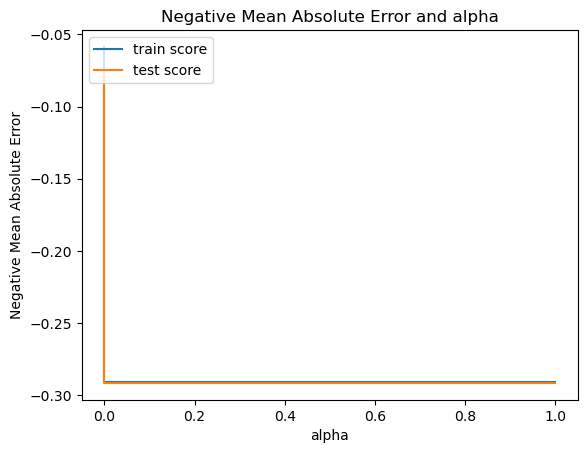

In [62]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
print(model_cv.best_params_)

{'alpha': 0.001}


Since the best alpha is around 0.001, in the graph we can see that the error stabilizes around this.

In [64]:
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [65]:
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.861),
 ('LotFrontage', 0.002),
 ('LotArea', 0.022),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.024),
 ('BsmtFinSF2', 0.003),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.054),
 ('2ndFlrSF', 0.013),
 ('GrLivArea', 0.103),
 ('BsmtFullBath', 0.011),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.004),
 ('HalfBath', 0.009),
 ('BedroomAbvGr', -0.0),
 ('Fireplaces', 0.018),
 ('GarageArea', 0.031),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', 0.007),
 ('EnclosedPorch', 0.003),
 ('ScreenPorch', 0.007),
 ('PropertyAge', -0.058),
 ('RemodAge', -0.031),
 ('GarageAge', -0.004),
 ('MSSubClass_30', -0.015),
 ('MSSubClass_40', 0.0),
 ('MSSubClass_45', 0.0),
 ('MSSubClass_50', 0.0),
 ('MSSubClass_60', -0.0),
 ('MSSubClass_70', 0.026),
 ('MSSubClass_75', 0.0),
 ('MSSubClass_80', 0.0),
 ('MSSubClass_85', 0.0),
 ('MSSubClass_90', -0.028),
 ('MSSubClass_120', 0.0),
 ('MSSubClass_160', -0.033),
 ('MSSubClass_180', -0.0),
 ('MSSubClass_190', -0.0),
 ('MSZoning_FV', 0.019),
 ('MSZoning_RH', 0.0),
 ('MSZoning_

In [66]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(f"R2 Train Data: {r2_train_lr:.2f}")
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(f"R2 Test Data: {r2_test_lr:.2f}")
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(f"RSS Train Data: {rss1_lr:.2f}")
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(f"RSS Test Data: {rss2_lr:.2f}")
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(f"MSE Train Data: {mse_train_lr:.2f}")
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(f"MSE Test Data: {mse_test_lr:.2f}")
metric3.append(mse_test_lr**0.5)

R2 Train Data: 0.93
R2 Test Data: 0.91
RSS Train Data: 10.91
RSS Test Data: 3.34
MSE Train Data: 0.01
MSE Test Data: 0.01


In [67]:
mod = list(zip(cols, model_parameters))

In [68]:
paramLasso = pd.DataFrame(mod)
paramLasso.columns = ['Variable', 'Coeff']
paramLasso.head(20)

,Variable,Coeff
0,constant,11.861
1,LotFrontage,0.002
2,LotArea,0.022
3,MasVnrArea,0.000
4,BsmtFinSF1,0.024
5,BsmtFinSF2,0.003
6,BsmtUnfSF,-0.000
7,TotalBsmtSF,0.054
8,2ndFlrSF,0.013
9,GrLivArea,0.103


In [69]:
paramLasso = paramLasso.sort_values((['Coeff']), axis = 0, ascending = False)
paramLasso

,Variable,Coeff
0,constant,11.861
106,OverallQual_9,0.133
105,OverallQual_8,0.110
9,GrLivArea,0.103
61,Neighborhood_Crawfor,0.100
206,Functional_Typ,0.062
7,TotalBsmtSF,0.054
104,OverallQual_7,0.052
115,OverallCond_9,0.048
123,Exterior1st_BrkFace,0.046


## Comparing coefficients after regularization

In [70]:
betas = pd.DataFrame(index=X.columns)

In [71]:
betas.rows = X.columns

In [72]:
#betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [73]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Ridge,Lasso
LotFrontage,0.004085,0.002340
LotArea,0.022855,0.021506
MasVnrArea,-0.004101,0.000000
BsmtFinSF1,0.007856,0.023688
BsmtFinSF2,0.000260,0.002962
BsmtUnfSF,-0.015241,-0.000057
TotalBsmtSF,0.061862,0.054152
2ndFlrSF,0.025026,0.012934
GrLivArea,0.092922,0.102683
BsmtFullBath,0.010223,0.010748


## <font color="blue"> Final Interpretation of model </font>

In [74]:
betas['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9           0.132772
OverallQual_8           0.109553
GrLivArea               0.102683
Neighborhood_Crawfor    0.100396
Functional_Typ          0.062057
TotalBsmtSF             0.054152
OverallQual_7           0.052071
OverallCond_9           0.048117
Exterior1st_BrkFace     0.045883
Condition1_Norm         0.042049
Name: Lasso, dtype: float64

In [75]:
betas['Ridge'].sort_values(ascending=False)[:10]

GrLivArea               0.092922
OverallCond_9           0.090660
Neighborhood_Crawfor    0.088957
OverallQual_9           0.085340
OverallQual_8           0.077185
Functional_Typ          0.062476
TotalBsmtSF             0.061862
Exterior1st_BrkFace     0.054447
MSZoning_FV             0.051813
Neighborhood_StoneBr    0.050171
Name: Ridge, dtype: float64

The __top features__ significant in predicting the price of house are:

`GrLivArea`, `OverallCond_9`, `Neighborhood_Crawfor`, `OverallQual_9`, `OverallQual_8`,  `Functional_Typ`, `TotalBsmtSF`, `Exterior1st_BrkFace`.

__Impact of top 3 predictors are as below__:

`GrLivArea` : One unit increase in GrLivArea variable increases the price of house by 0.09 / 0.10 units. Higher ground living area square feet are associated with higher house prices.

`OverallCond_9` : One unit increase in OverallCond_9 variable increases the price of house by 0.09 / 0.13 units. Higher the rating of house condition, higher the house price.

`Neighborhood_Crawfor` : One unit increase in Neighborhood_Crawfor variable increases the price of house by 0.08/0.10 units. The house prices are higher in the neighborhood of Crawford. 


In [76]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression with RFE': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression with RFE'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression with RFE,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.893242,0.939078,0.925013
1,R2 Score (Test),0.857192,0.914340,0.907096
2,RSS (Train),15.539092,8.867474,10.914652
3,RSS (Test),5.137716,3.081726,3.342348
4,MSE (Train),0.115343,0.087132,0.096668
5,MSE (Test),0.132646,0.102732,0.106988


Looking at the summary of metrics,
1. ___Ridge Regression and Lasso Regression outperform Linear Regression with RFE in terms of R2 Score (both on the training and test datasets) and have lower Mean Squared Error (MSE) values.___
These results suggest that Ridge and Lasso Regression are providing better fits to the data and better generalization to the test dataset compared to the basic Linear Regression model.
2. ___Additionally, Ridge Regression has the lowest RSS (Residual Sum of Squares) on the test dataset, indicating good model fit.___

<font color="green"> Optimal value of alpha for ridge: 9.0 </font> <br>
<font color="green"> Optimal value of alpha for lasso: 0.001 </font>